__Сборный проект 1__

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Задача - выявить определяющие успешность игры закономерности необходимые интернет-магазину компьютерных игр на декабрь 2016 г.

# Оглавление

* [Шаг 1. Открытие файла с данными и изучение общей информации](#Шаг-1.-Открытие-файла-с-данными-и-изучение-общей-информации)
    * [Выводы (шаг 1)](#Выводы-(шаг-1))
* [Шаг 2. Подготовка данных](#Шаг-2.-Подготовка-данных)
    * [Обработка пропусков и замена типа данных в столбцах](#Обработка-пропусков-и-замена-типа-данных-в-столбцах)
    * [Расчет суммарных продаж во всех регионах](#Расчет-суммарных-продаж-во-всех-регионах)
    * [Выводы (шаг 2)](#Выводы-(шаг-2))
* [Шаг 3. Исследовательский анализ данных](#Шаг-3.-Исследовательский-анализ-данных)
    * [Cколько игр выпускалось в разные годы](#Cколько-игр-выпускалось-в-разные-годы)
    * [Как менялись продажи игр по платформам](#Как-менялись-продажи-игр-по-платформам)
    * [Отделение данных за актуальный период](#Отделение-данных-за-актуальный-период)
    * [Какие платформы лидируют по продажам, растут или падают](#Какие-платформы-лидируют-по-продажам,-растут-или-падают)
    * [График «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам](#График-«ящик-с-усами»-по-глобальным-продажам-каждой-игры-и-разбивкой-по-платформам)
    * [Как влияют на продажи игр Sony PlayStation 4 отзывы пользователей и критиков](#Как-влияют-на-продажи-игр-Sony-PlayStation-4-отзывы-пользователей-и-критиков)
    * [Распределение игр и продаж по жанрам](#Распределение-игр-и-продаж-по-жанрам)
    * [Выводы (шаг 3)](#Выводы-(шаг-3))
* [Шаг 4. Составление портрета пользователя каждого региона](#Шаг-4.-Составление-портрета-пользователя-каждого-региона)
    * [Самые популярные платформы](#Самые-популярные-платформы)
    * [Самые популярные жанры](#Самые-популярные-жанры)
    * [Влияние рейтинга ESRB на продажи](#Влияние-рейтинга-ESRB-на-продажи)
    * [Выводы (шаг 4)](#Выводы-(шаг-4))
* [Шаг 5. Проверка гипотез](#Шаг-5.-Проверка-гипотез)
    * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые)
    * [Средние пользовательские рейтинги жанров Action и Sports разные](#Средние-пользовательские-рейтинги-жанров-Action-и-Sports-разные)
    * [Выводы (шаг 5)](#Выводы-(шаг-5))
* [Шаг 6. Общий вывод](#Шаг-6.-Общий-вывод)

# Шаг 1. Открытие файла с данными и изучение общей информации

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [181]:
data = pd.read_csv('games.csv')

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [183]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [184]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Выводы (шаг 1) 

Файл с данными содержит 11 столбцов (6 с плавающей точкой и 5 с объектами) и 16715 записей.


- В столбцах __Name__, __Year_of_Release__, __Genre__, __Critic_Score__, __User_Score__ и __Rating__ есть пропуски. Их необходимо обработать не следующем шаге;
- Столбец __Year_of_Release__ содержит целочисленные данные (годы) и должен быть преобразован к соответствующему типу;
- Столбец __Critic_Score__, предположительно, содержит целочисленные данные. Данную гипотезу необходимо проверить на следующем шаге;
- В столбцах __NA_sales__, __EU_sales__, __JP_sales__ и __Other_sales__ содержится очень много нулей. На столько много, что медианы в этих столбцах равны или очень близки к 0. Данную аномалию необходимо проверить на следующем шаге;
- Столбец __User_Score__ имеет тип object, что означает, что в нем содержатся не только цифры и пропущенные значения. Данную аномалию необходимо проверить на следующем шаге.

# Шаг 2. Подготовка данных

### Приведение названий столбцов к нижнему регистру

In [187]:
data.columns = data.columns.str.lower()

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Обработка пропусков и замена типа данных в столбцах

### Удаление пропусков в столбце name

In [188]:
# Просмотр описания записей с пропуском с столбце name
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [189]:
# Удаление записей с пропуском в столбце name
data.dropna(subset=['name'], inplace=True)

data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Проверка столбца platform

In [190]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### Заполнение и удаление пропусков и приведение столбце year_of_release к целочисленному типу

In [191]:
# Проерка наличия аномалий в столбце
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [192]:
# Оценка записей с пропущенными занчениями в столбце year_of_release
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [193]:
# Функция определяющая по названию игры год ее выпуска, если в названии содержится год. 
# Основана на том, что если в названии игры содержится год, то игру выпускают годом ранее, например, FIFA 20 выпускают в 2019 году
# row - (Series) Строка из набора данных
# возвращает - (int) Год выпуска игры
def get_year_from_name(row):
    name_splited = row['name'].split(' ')
    
    # Поиск цифр в названии
    for part in name_splited:
        # Проверка следующих условий :
        # - элемент должен быть цифрой;
        # - элемент должен быть длиной 2 или 4 символа (полное или сокращенное написание года, например 2020 или 20);
        # - элемент должен вписывать во временные рамки данных (с 1980 по 2016 гг.);
        # - элемент должен стоять на последнем месте в названии;
        if part.isnumeric() and np.isin(len(part), [2, 4]) and (int(part) >= 80 or int(part) <= 16) and part == name_splited[-1]:
            # Обработка полных написаний года
            if len(part) == 4:
                return int(part) - 1
            
            # Обработка сокращенных написаний года, для годов, начиная с 2000
            if int(part) >= 0 and int(part) < 80:
                return int('20' + part) - 1
                
            # Обработка сокращенных написаний года, для годов, до 2000
            return int('19' + part) - 1

In [194]:
# Функция для вывода доли пропущенных значений в столбце (синтаксический сахар)
# column_name - (string) Название столбца
def get_missing_values_proportion(column_name):
    length = len(data.query(column_name + '.isnull()'))
    
    print('Пропущенных значений - {} ({:.2%})'.format(length, length / len(data)), sep='')

In [195]:
get_missing_values_proportion('year_of_release')

Пропущенных значений - 269 (1.61%)


In [196]:
# Заполнение части пропусков в столбце year_of_release на основе названий игр
data.loc[data['year_of_release'].isnull(), 'year_of_release'] = data[data['year_of_release'].isnull()].apply(get_year_from_name, axis=1)

In [197]:
get_missing_values_proportion('year_of_release')

Пропущенных значений - 249 (1.49%)


In [198]:
# Функция для получения моды года релиза игры по разным платформам
# row - (Series) Строка из набора данных
# возвращает - (int) Мода года релиза игры по разным платформам
def get_year_of_release_mode(row):
    mode = data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['year_of_release'].isnull() == False)
    ]['year_of_release'].mode()
    
    if len(mode) == 0:
        return np.NaN
    
    return mode[0]

In [199]:
# Создание DataFrame с играми у которых есть порты на разных платформах
duplicated_data = data[data['name'].isin(data[data['name'].duplicated()]['name'].unique())].copy()

duplicated_data.sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
14658,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
...,...,...,...,...,...,...,...,...,...,...,...
2583,pro evolution soccer 2011,PSP,2010.0,Sports,0.05,0.30,0.29,0.16,74.0,5.8,E
7149,pro evolution soccer 2011,Wii,2010.0,Sports,0.07,0.10,0.03,0.02,78.0,5.4,E
12648,pro evolution soccer 2011,PC,2010.0,Sports,0.00,0.05,0.00,0.01,79.0,NaN,NaN
15612,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E


In [200]:
# Проверка гипотезы о том, что годы релиза игры для разных платформ отличаются незначительно (на основе моды)
duplicated_data['year_of_release_mode'] = duplicated_data.apply(get_year_of_release_mode, axis=1)

print('Степень корреляции между модами годов релизов игр по разным платформам с реальными годами релиза -', duplicated_data['year_of_release_mode'].corr(duplicated_data['year_of_release']))

Степень корреляции между модами годов релизов игр по разным платформам с реальными годами релиза - 0.8929002504713897


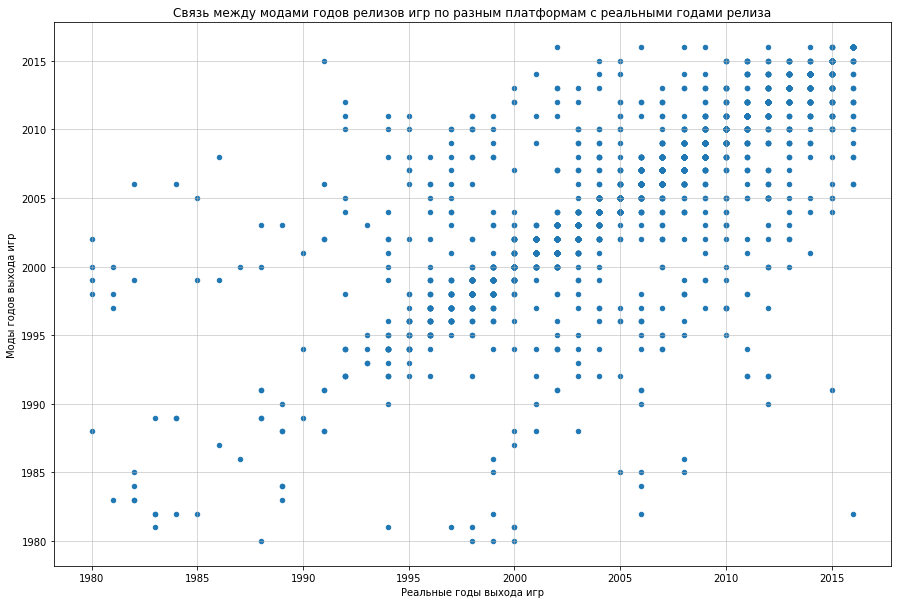

In [201]:
# Визуальная проверка гипотезы о том, что годы релиза игры для разных платформ отличаются незначительно (на основе моды)
duplicated_data.plot(kind='scatter', x='year_of_release', y='year_of_release_mode', figsize=(15, 10))
plt.xlabel('Реальные годы выхода игр')
plt.ylabel('Моды годов выхода игр')
plt.grid(linewidth=0.5)
plt.title('Связь между модами годов релизов игр по разным платформам с реальными годами релиза')
plt.show()

In [202]:
# Заполнение пропусков на моды годов релиза игр критиками по платформам
data.loc[data['year_of_release'].isnull(), 'year_of_release'] = data[data['year_of_release'].isnull()].apply(get_year_of_release_mode, axis=1)

get_missing_values_proportion('year_of_release')

Пропущенных значений - 138 (0.83%)


In [203]:
# Удаление оставшихся пропусков
data.dropna(subset=['year_of_release'], inplace=True)

get_missing_values_proportion('year_of_release')

Пропущенных значений - 0 (0.00%)


In [204]:
# Приведение столбца к целочисленному типу
data['year_of_release'] = data['year_of_release'].astype('int')

data['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

### Проверка столбца genre

In [205]:
data['genre'].value_counts()

Action          3342
Sports          2338
Misc            1735
Role-Playing    1484
Shooter         1311
Adventure       1294
Racing          1238
Platform         879
Simulation       860
Fighting         843
Strategy         678
Puzzle           573
Name: genre, dtype: int64

### Проверка столбца na_sales

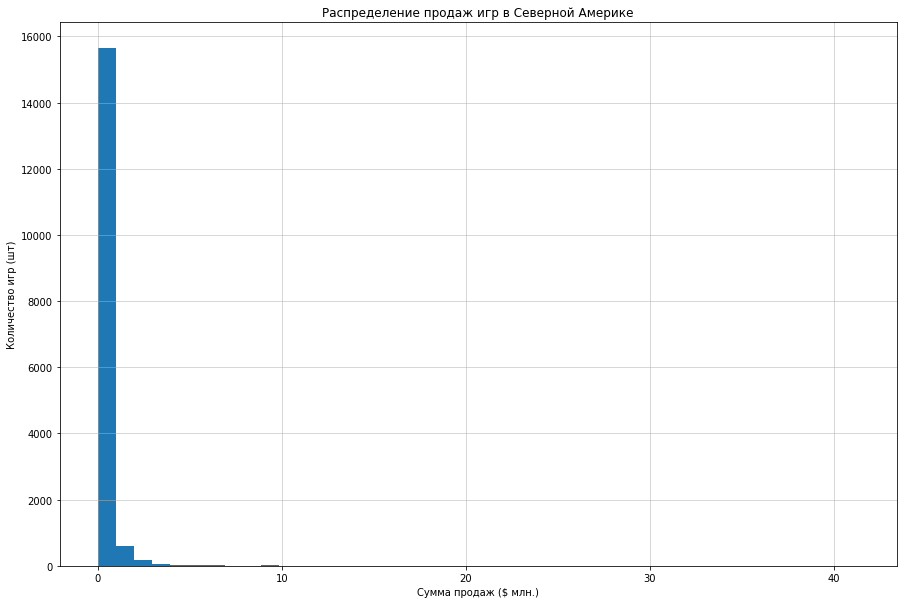

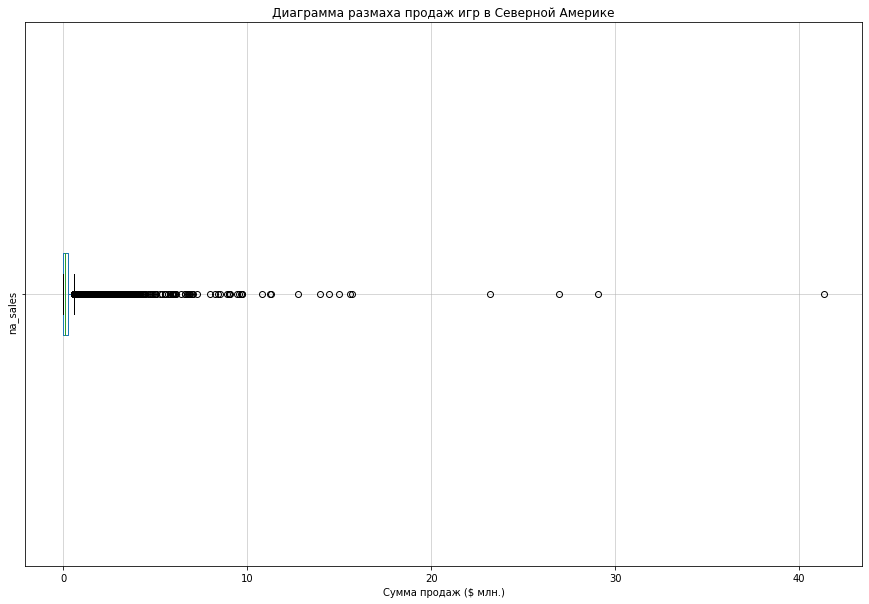

In [206]:
# Визуальная оценка распределения продаж в Северной Америке
data['na_sales'].hist(bins=42, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в Северной Америке')
plt.show()

data.boxplot(column='na_sales', vert=False, figsize=(15, 10), rot=90)
plt.xlabel('Сумма продаж ($ млн.)')
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха продаж игр в Северной Америке')
plt.show()

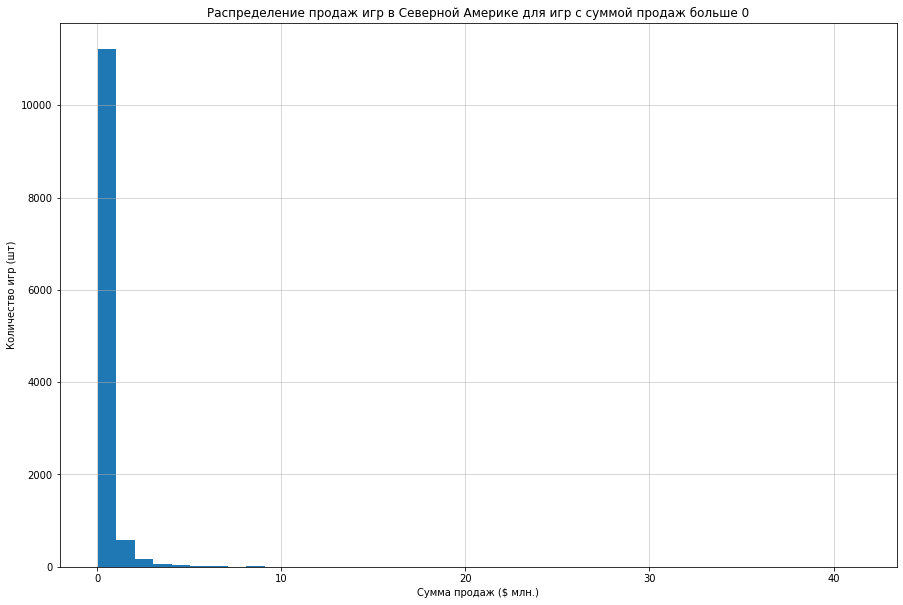

In [207]:
# Проверка гипотезы о том, что есть очень много значений равных 0
data.query('na_sales > 0')['na_sales'].hist(bins=41, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в Северной Америке для игр c суммой продаж больше 0')
plt.show()

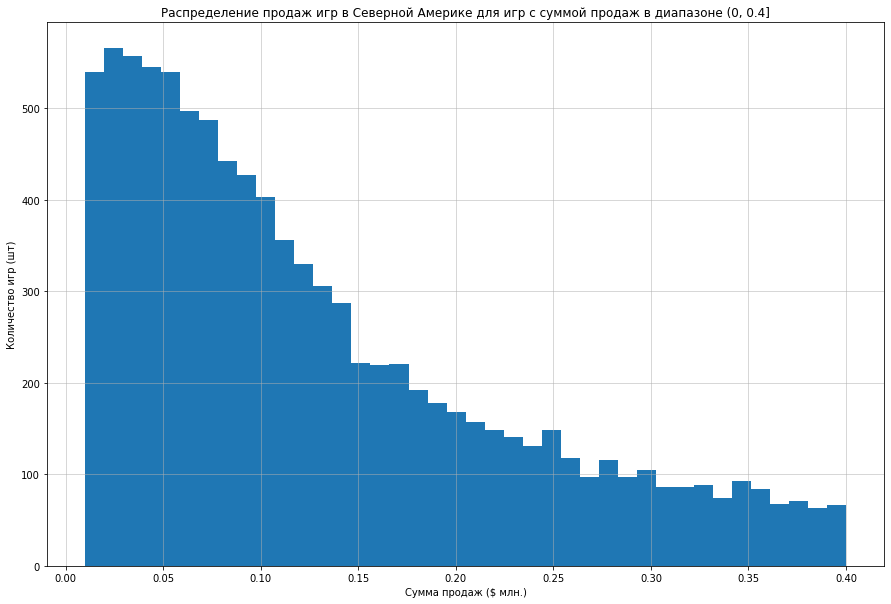

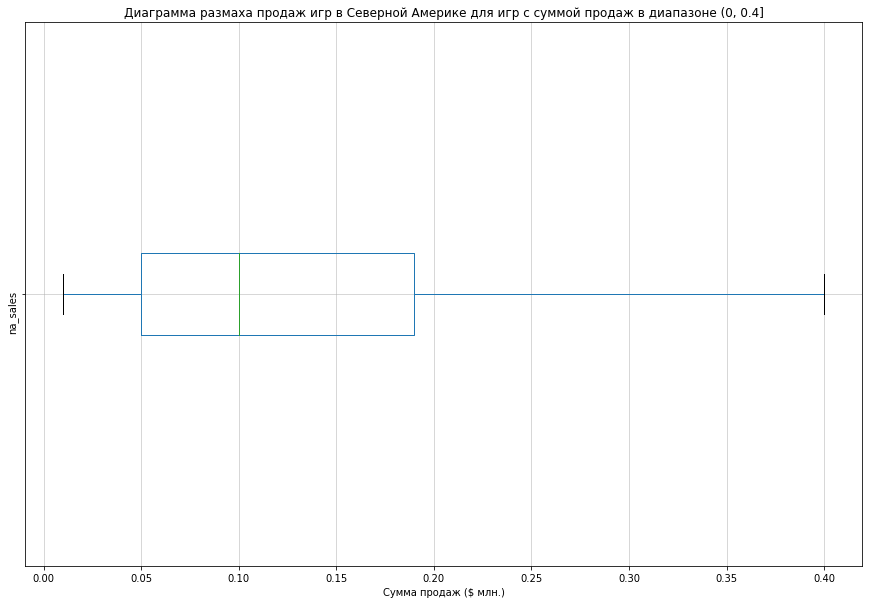

In [208]:
# Визуальная оценка распределения продаж основной массы игры в Северной Америке (без учета игр с нулевыми продажами)
data.query('na_sales <= 0.4 and na_sales > 0')['na_sales'].hist(bins=40, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в Северной Америке для игр c суммой продаж в диапазоне (0, 0.4]')
plt.show()

data.query('na_sales <= 0.4 and na_sales > 0').boxplot(column='na_sales', vert=False, figsize=(15, 10), rot=90)
plt.xlabel('Сумма продаж ($ млн.)')
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха продаж игр в Северной Америке для игр c суммой продаж в диапазоне (0, 0.4]')
plt.show()

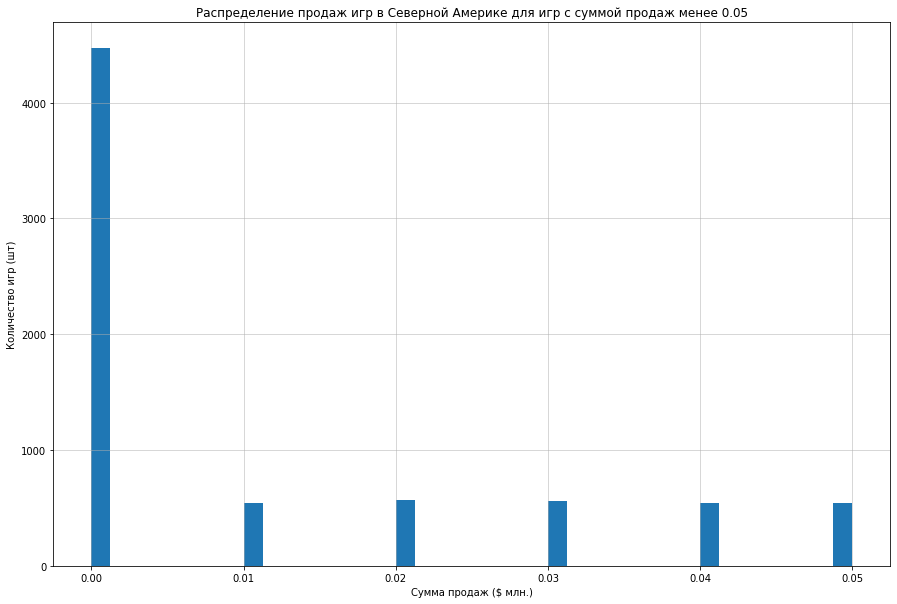

In [209]:
# Проверка гипотезы о том, что нулевые продажи, это продажи менее $10 тыс.
data.query('na_sales <= 0.05')['na_sales'].hist(bins=40, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в Северной Америке для игр c суммой продаж менее 0.05')
plt.show()

In [210]:
print('Количество игр с продажами, равными 0 - {} ({:.2%})'.format(len(data.query('na_sales == 0')), len(data.query('na_sales == 0')) / len(data)))

Количество игр с продажами, равными 0 - 4471 (26.97%)


In [211]:
# Проверка игр с очень большим уровнем продаж на достоверность
data.query('na_sales > 20')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Проверка столбца eu_sales

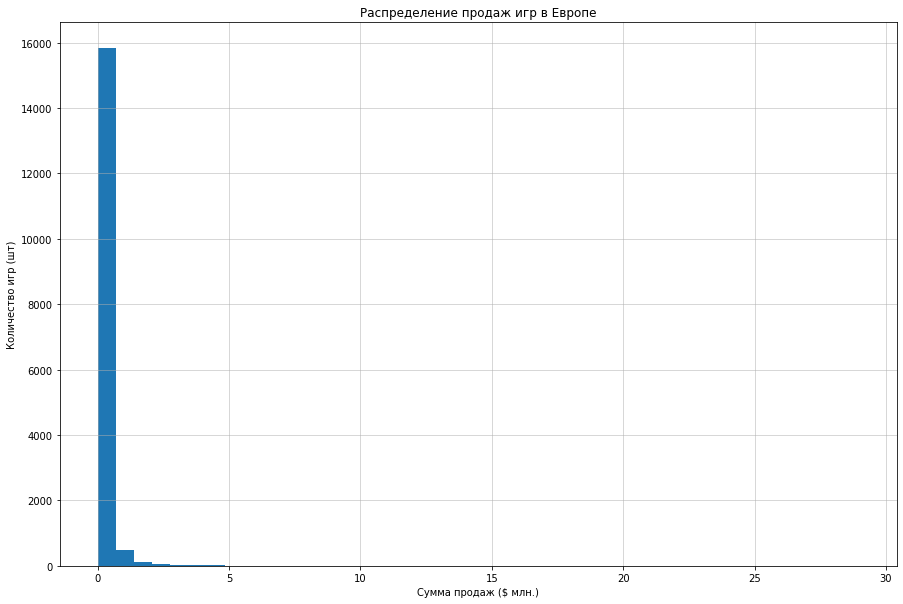

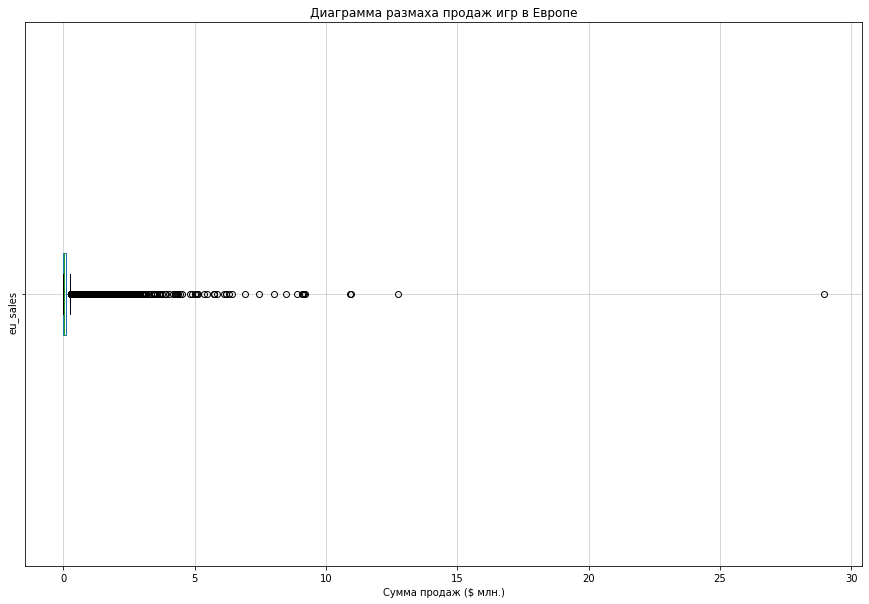

In [212]:
# Визуальная оценка распределения продаж в Европе
data['eu_sales'].hist(bins=42, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в Европе')
plt.show()

data.boxplot(column='eu_sales', vert=False, figsize=(15, 10), rot=90)
plt.xlabel('Сумма продаж ($ млн.)')
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха продаж игр в Европе')
plt.show()

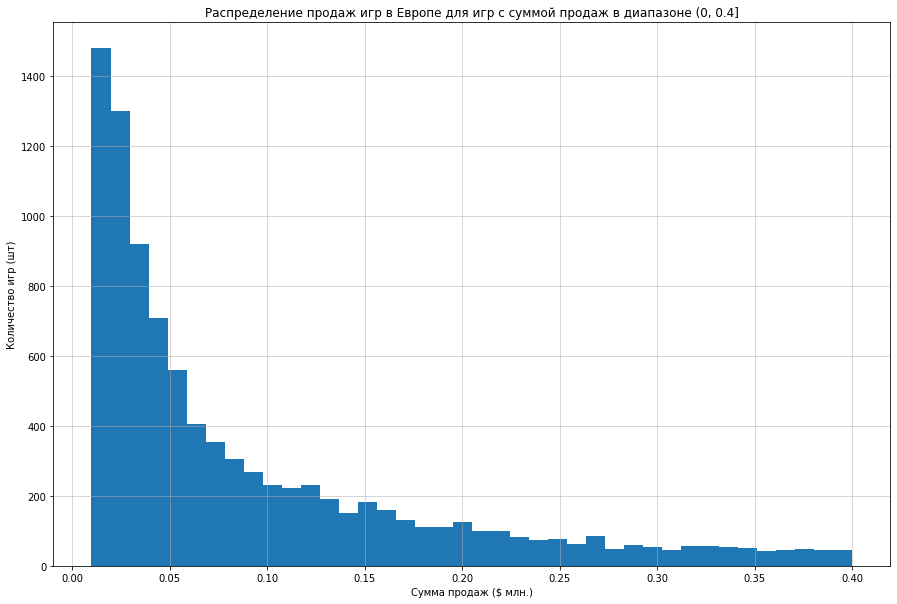

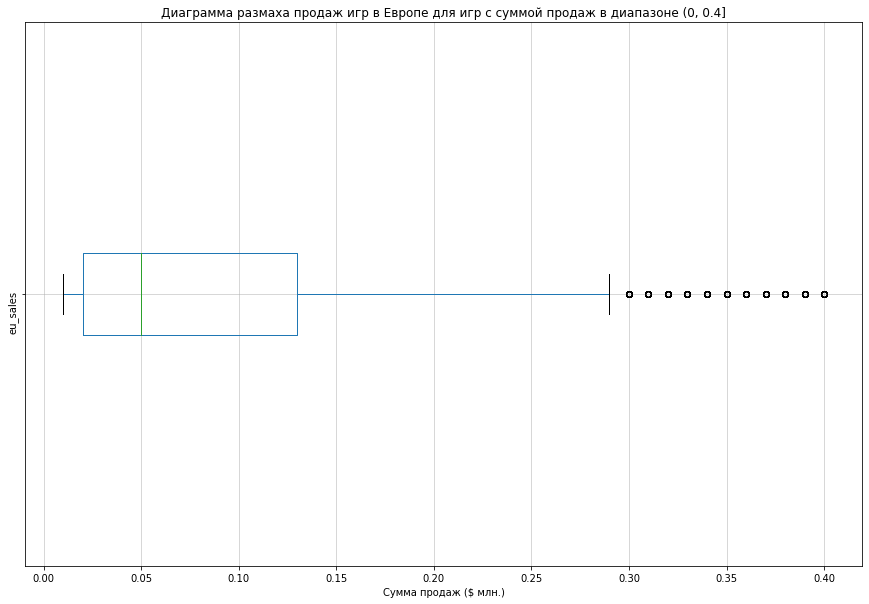

In [213]:
# Визуальная оценка распределения продаж основной массы игры в Европе (без учета игр с нулевыми продажами)
data.query('eu_sales <= 0.4 and eu_sales > 0')['eu_sales'].hist(bins=40, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в Европе для игр c суммой продаж в диапазоне (0, 0.4]')
plt.show()

data.query('eu_sales <= 0.4 and eu_sales > 0').boxplot(column='eu_sales', vert=False, figsize=(15, 10), rot=90)
plt.xlabel('Сумма продаж ($ млн.)')
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха продаж игр в Европе для игр c суммой продаж в диапазоне (0, 0.4]')
plt.show()

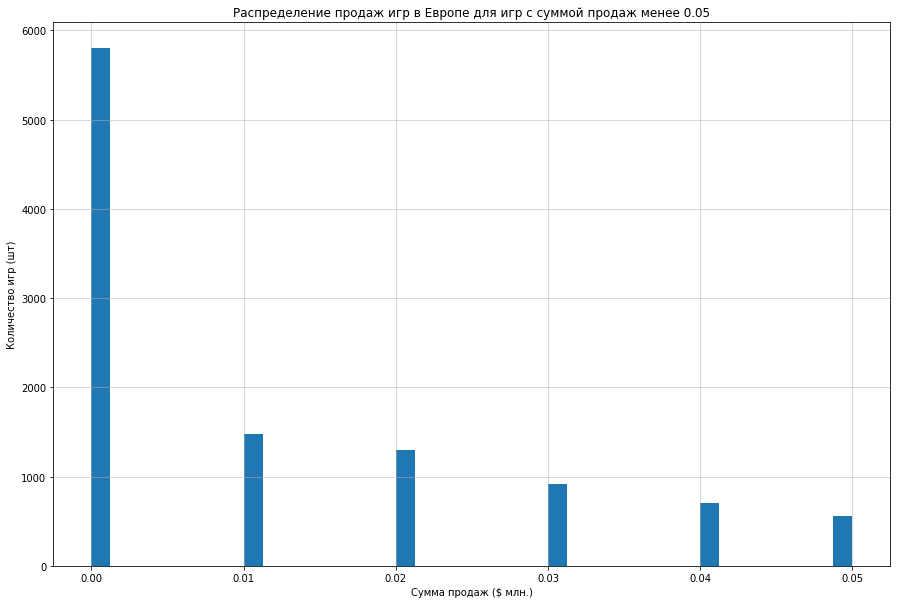

In [214]:
# Проверка гипотезы о том, что нулевые продажи, это продажи менее $10 тыс.
data.query('eu_sales <= 0.05')['eu_sales'].hist(bins=40, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в Европе для игр c суммой продаж менее 0.05')
plt.show()

In [215]:
print('Количество игр с продажами, равными 0 - {} ({:.2%})'.format(len(data.query('eu_sales == 0')), len(data.query('eu_sales == 0')) / len(data)))

Количество игр с продажами, равными 0 - 5801 (35.00%)


In [216]:
# Проверка игр с очень большим уровнем продаж на достоверность
data.query('eu_sales > 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


### Проверка столбца jp_sales

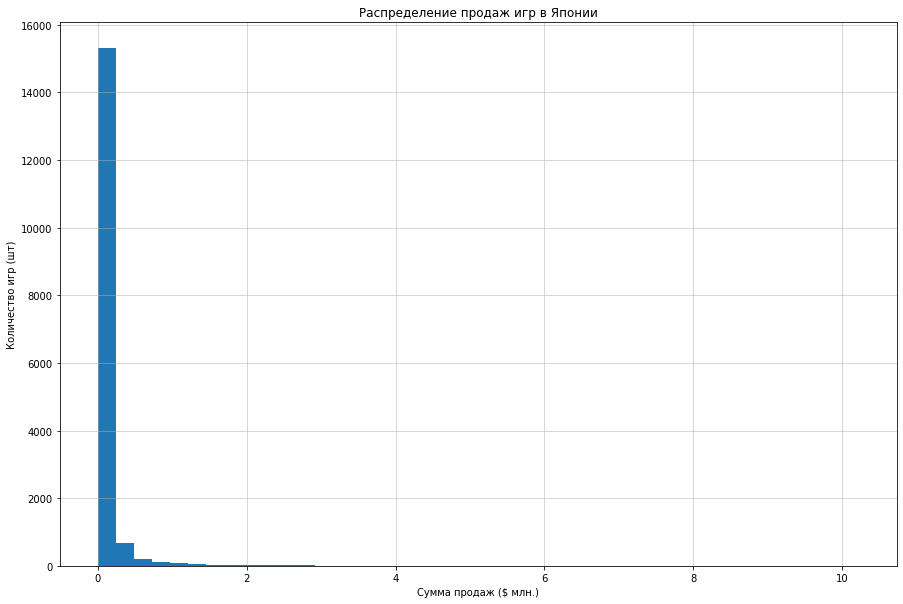

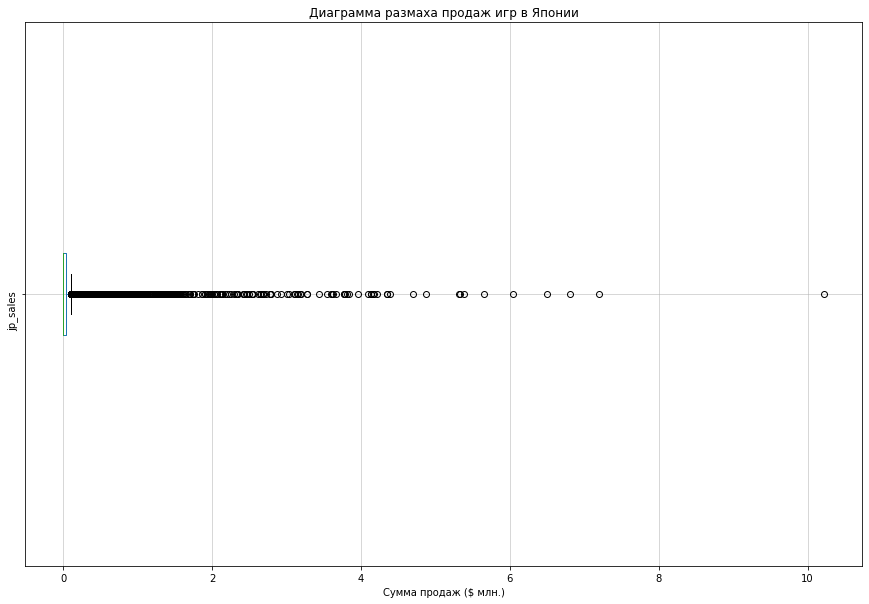

In [217]:
# Визуальная оценка распределения продаж в Японии
data['jp_sales'].hist(bins=42, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в Японии')
plt.show()

data.boxplot(column='jp_sales', vert=False, figsize=(15, 10), rot=90)
plt.xlabel('Сумма продаж ($ млн.)')
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха продаж игр в Японии')
plt.show()

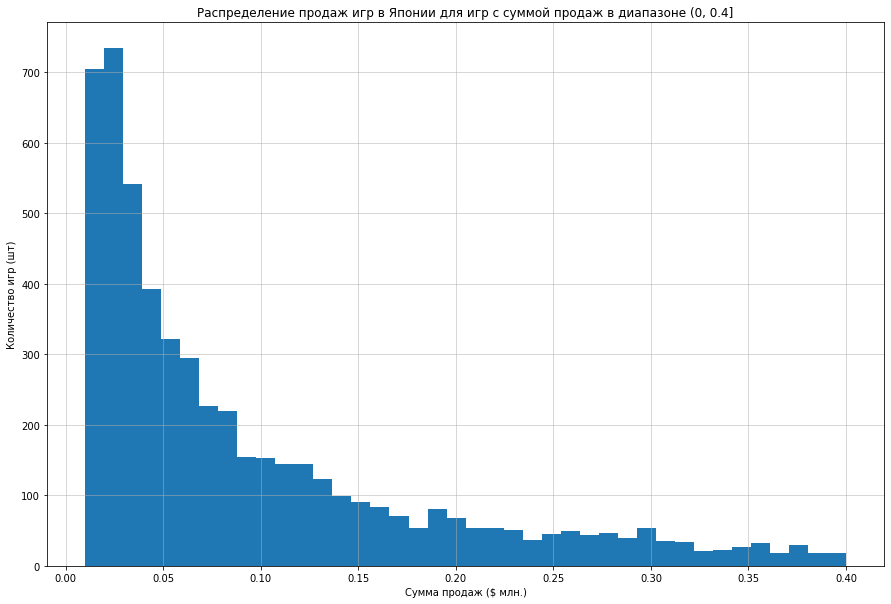

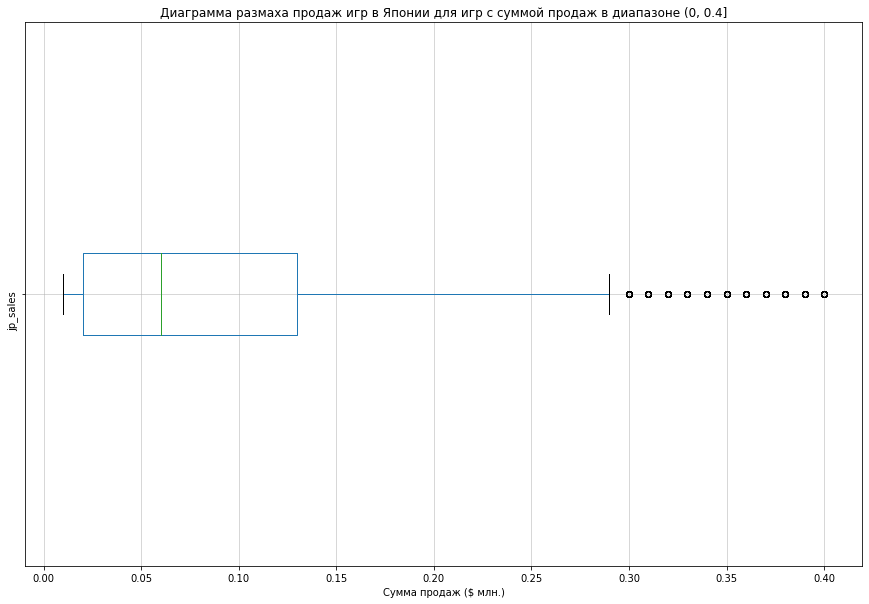

In [218]:
# Визуальная оценка распределения продаж основной массы игры в Японии (без учета игр с нулевыми продажами)
data.query('jp_sales <= 0.4 and jp_sales > 0')['jp_sales'].hist(bins=40, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в Японии для игр c суммой продаж в диапазоне (0, 0.4]')
plt.show()

data.query('jp_sales <= 0.4 and jp_sales > 0').boxplot(column='jp_sales', vert=False, figsize=(15, 10), rot=90)
plt.xlabel('Сумма продаж ($ млн.)')
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха продаж игр в Японии для игр c суммой продаж в диапазоне (0, 0.4]')
plt.show()

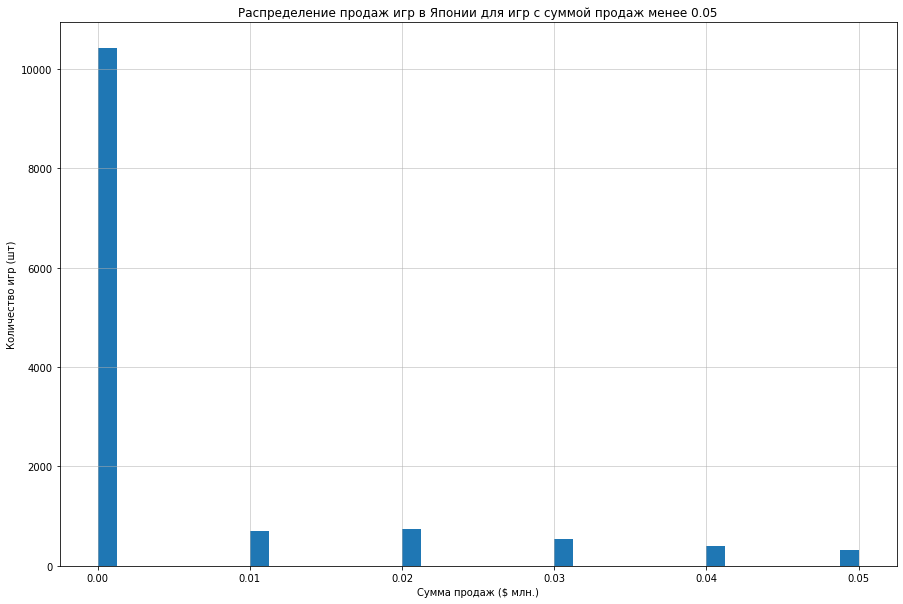

In [219]:
# Проверка гипотезы о том, что нулевые продажи, это продажи менее $10 тыс.
data.query('jp_sales <= 0.05')['jp_sales'].hist(bins=40, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в Японии для игр c суммой продаж менее 0.05')
plt.show()

In [220]:
print('Количество игр с продажами, равными 0 - {} ({:.2%})'.format(len(data.query('jp_sales == 0')), len(data.query('jp_sales == 0')) / len(data)))

Количество игр с продажами, равными 0 - 10414 (62.83%)


In [221]:
# Проверка игр с очень большим уровнем продаж на достоверность
data.query('jp_sales > 6')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN


### Проверка столбца other_sales

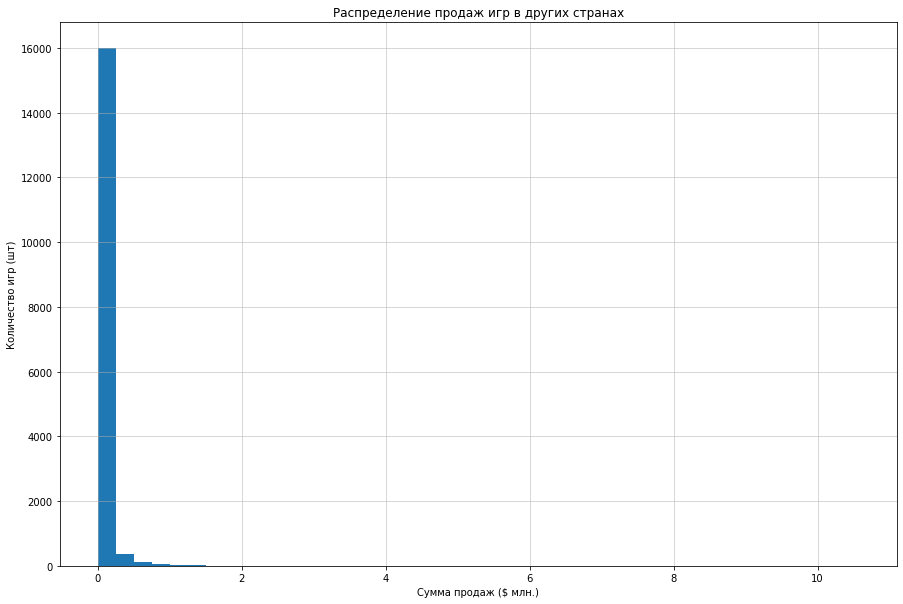

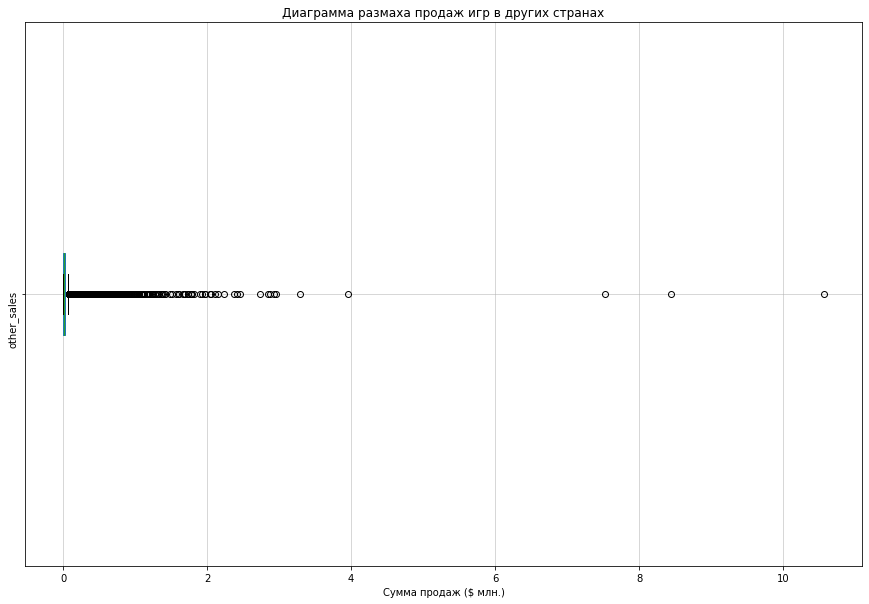

In [222]:
# Визуальная оценка распределения продаж в других странах
data['other_sales'].hist(bins=42, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в других странах')
plt.show()

data.boxplot(column='other_sales', vert=False, figsize=(15, 10), rot=90)
plt.xlabel('Сумма продаж ($ млн.)')
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха продаж игр в других странах')
plt.show()

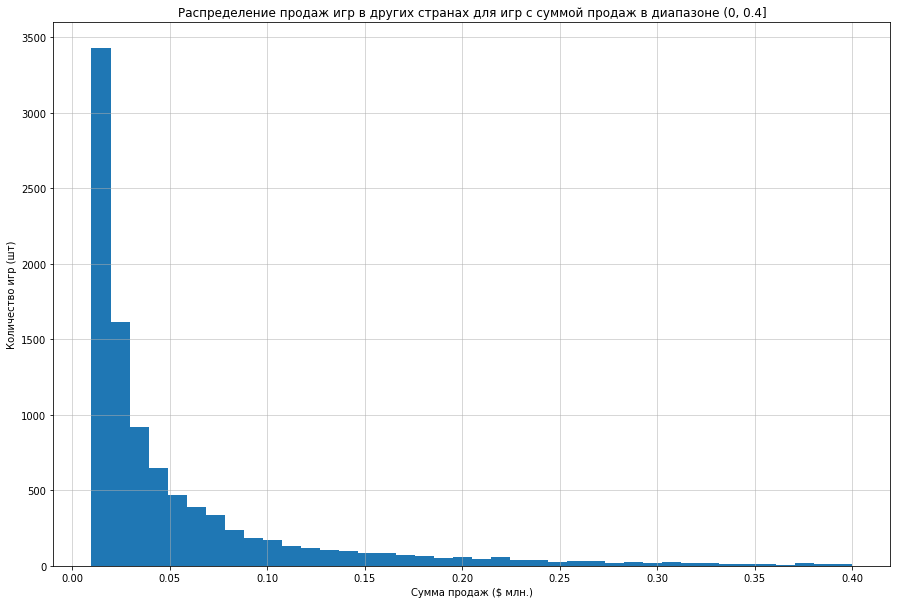

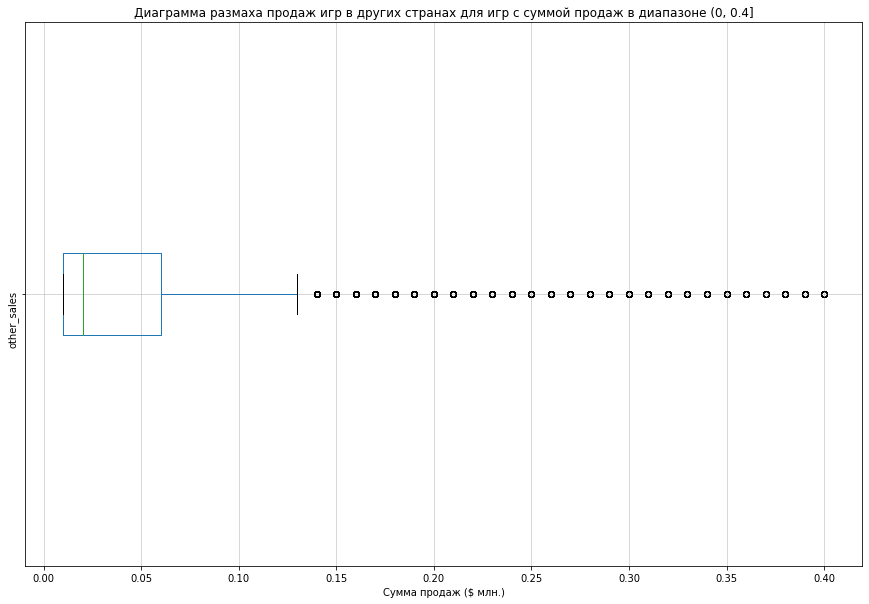

In [223]:
# Визуальная оценка распределения продаж основной массы игры в других странах (без учета игр с нулевыми продажами)
data.query('other_sales <= 0.4 and other_sales > 0')['other_sales'].hist(bins=40, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в других странах для игр c суммой продаж в диапазоне (0, 0.4]')
plt.show()

data.query('other_sales <= 0.4 and other_sales > 0').boxplot(column='other_sales', vert=False, figsize=(15, 10), rot=90)
plt.xlabel('Сумма продаж ($ млн.)')
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха продаж игр в других странах для игр c суммой продаж в диапазоне (0, 0.4]')
plt.show()

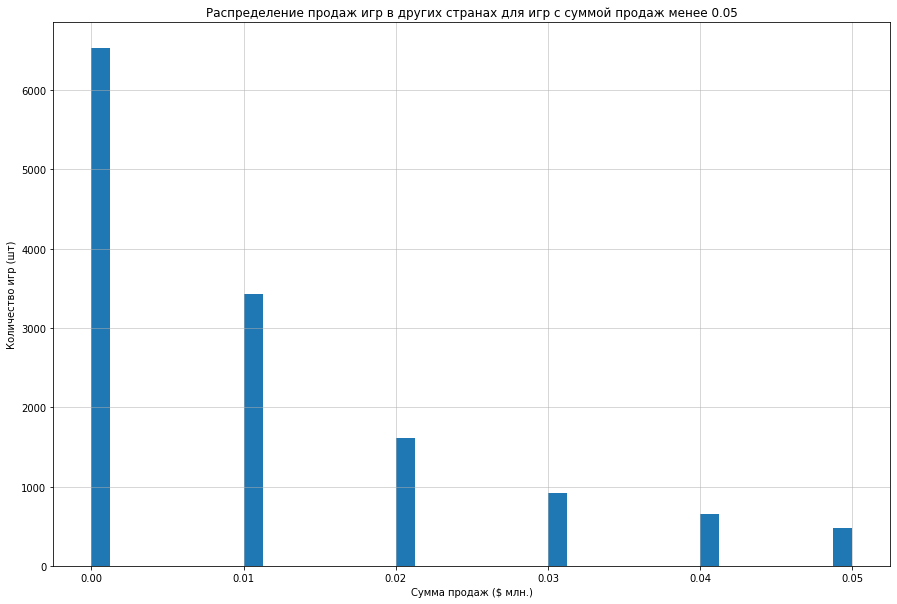

In [224]:
# Проверка гипотезы о том, что нулевые продажи, это продажи менее $10 тыс.
data.query('other_sales <= 0.05')['other_sales'].hist(bins=40, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в других странах для игр c суммой продаж менее 0.05')
plt.show()

In [225]:
print('Количество игр с продажами, равными 0 - {} ({:.2%})'.format(len(data.query('other_sales == 0')), len(data.query('other_sales == 0')) / len(data)))

Количество игр с продажами, равными 0 - 6529 (39.39%)


In [226]:
# Проверка игр с очень большим уровнем продаж на достоверность
data.query('other_sales > 3')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9,M
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E


### Заполнение пропусков в столбце critic_score

In [227]:
# Оценка основных статистических параметров столбца
data['critic_score'].describe()

count    8079.000000
mean       68.989108
std        13.922846
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

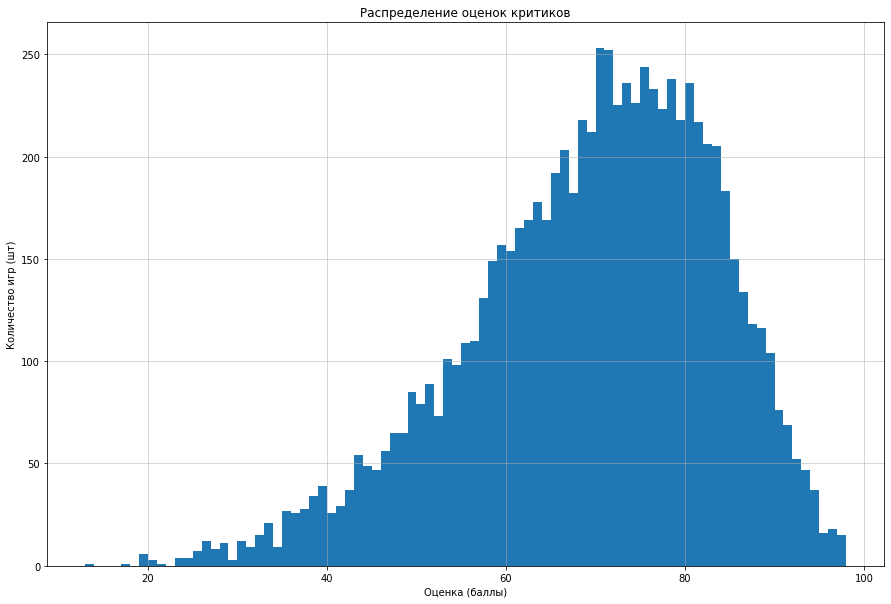

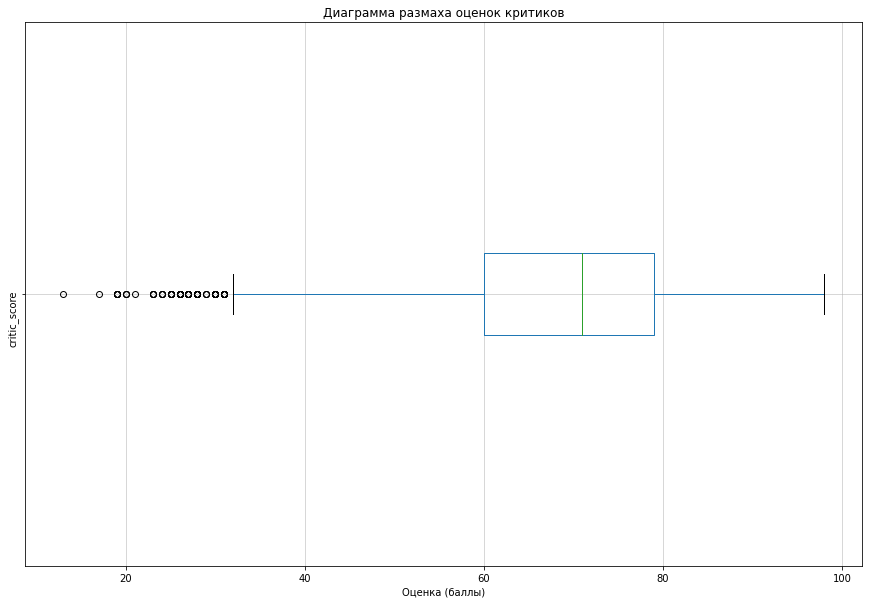

In [228]:
# Визуальная оценка распределения данных столбца
data['critic_score'].hist(bins=85, figsize=(15, 10))
plt.xlabel('Оценка (баллы)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение оценок критиков')
plt.show()

data.boxplot(column='critic_score', vert=False, figsize=(15, 10), rot=90)
plt.xlabel('Оценка (баллы)')
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха оценок критиков')
plt.show()

In [229]:
get_missing_values_proportion('critic_score')

Пропущенных значений - 8496 (51.26%)


In [230]:
# Визуальная оценка записей с пропущенными значениями в столбце critic_score
data[(data['critic_score'].isnull())].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [231]:
# Проверка гипотезы о том, что данные об оценках парсились по ссылкам с сайта Metacritic
data[data['name'] == 'Call of Duty: Black Ops II']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
1227,Call of Duty: Black Ops II,PC,2012,Shooter,0.64,0.69,0.00,0.19,74.0,4.2,M
4706,Call of Duty: Black Ops II,WiiU,2012,Shooter,0.20,0.18,0.00,0.03,81.0,6.9,M


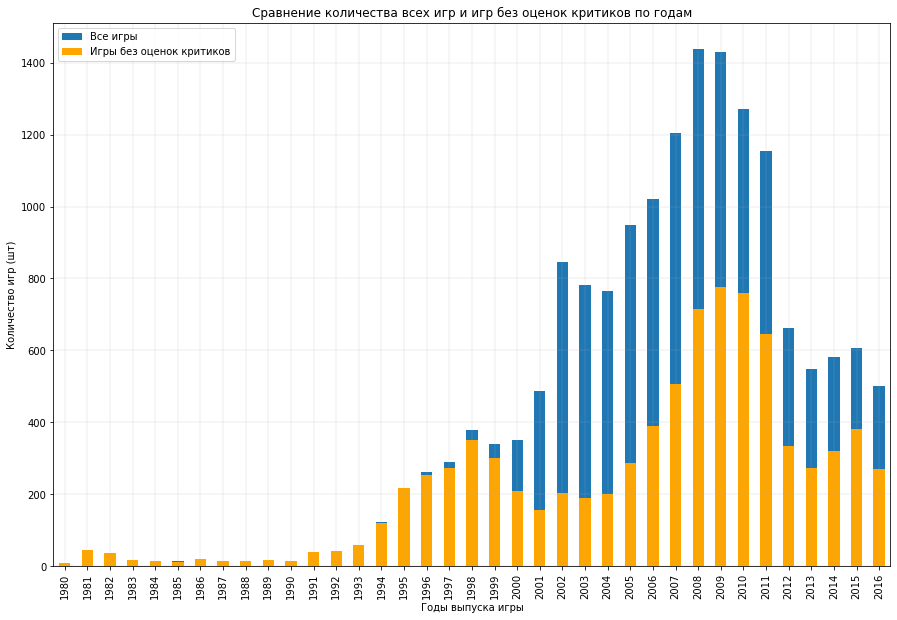

In [232]:
(
    data
    .groupby('year_of_release')
    ['name']
    .count()
    .plot(kind='bar', figsize=(15,10), label='Все игры', legend=True)
)

(
    data
    .query('critic_score.isnull()')
    .groupby('year_of_release')
    ['name']
    .count()
    .plot(kind='bar', figsize=(15,10), color='orange', label='Игры без оценок критиков', legend=True, title='Сравнение количества всех игр и игр без оценок критиков по годам')
)

plt.xlabel('Годы выпуска игры')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.2)
plt.show()

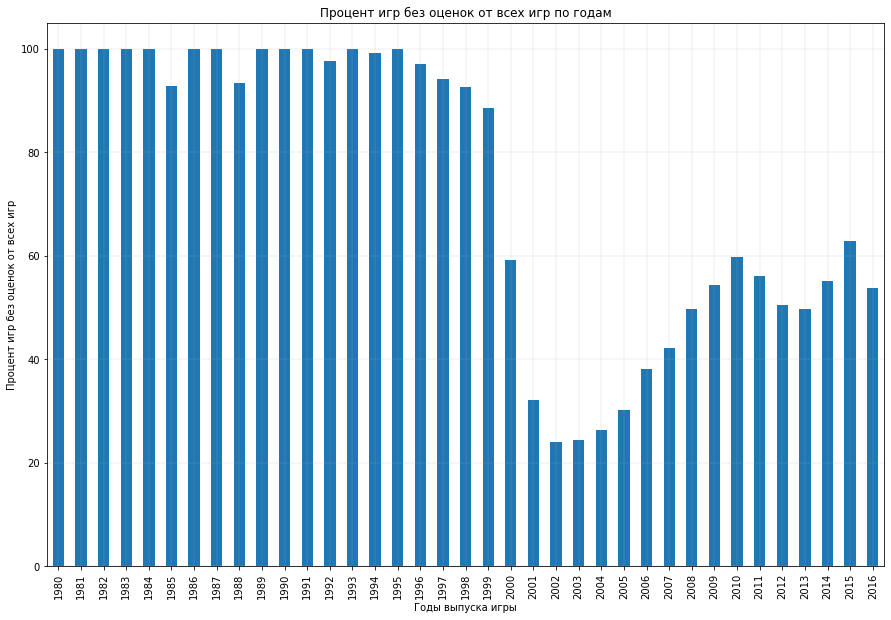

In [233]:
(
    (data.query('critic_score.isnull()').groupby('year_of_release')['name'].count() / data.groupby('year_of_release')['name'].count() * 100)
    .plot(kind='bar', figsize=(15,10), title='Процент игр без оценок от всех игр по годам')
)

plt.xlabel('Годы выпуска игры')
plt.ylabel('Процент игр без оценок от всех игр')
plt.grid(linewidth=0.2)
plt.show()

#### Замена зачений 'tbd' в столбце user_score на NaN и смена типа столбца (необходимо для проверки связи между оценками пользователей и критиков)

In [234]:
# Проверка наличия нечисловых значений в столбце
data['user_score'].value_counts()

tbd    2395
7.8     324
8       288
8.2     279
8.3     253
       ... 
1         2
0.5       2
1.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [235]:
# Замена значений 'tbd' на NaN
data['user_score'].replace('tbd', np.NaN, inplace=True)

# Приведение к типу float
data['user_score'] = data['user_score'].astype('float')

data['user_score'].describe()

count    7543.000000
mean        7.125507
std         1.498186
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Степень корреляции оценок пользователей и критиков - 0.5798584114724801


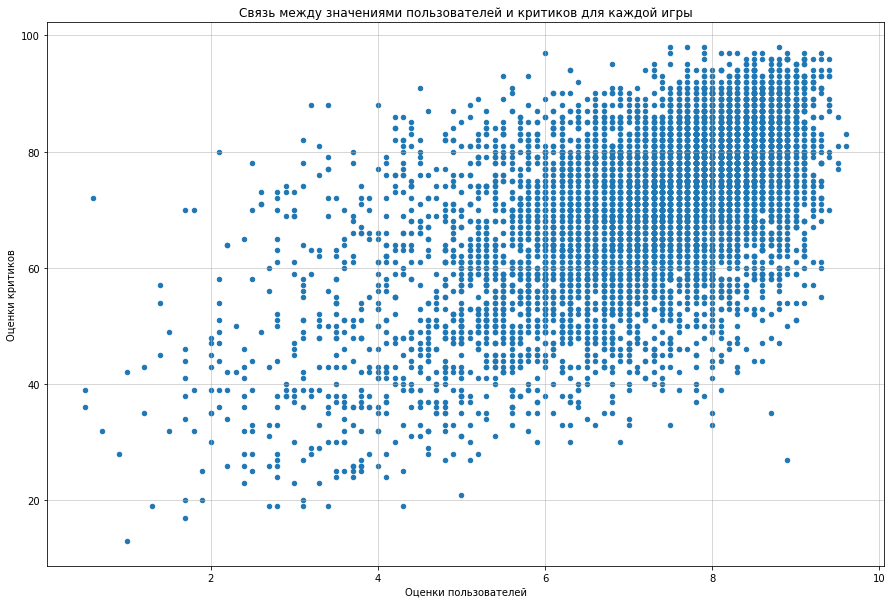

In [236]:
# Проверка гипотезы о наличие связи между оценками ользователей и критиков
print('Степень корреляции оценок пользователей и критиков -', data['critic_score'].corr(data['user_score']))

data.plot(kind='scatter', x='user_score', y='critic_score', figsize=(15, 10))
plt.xlabel('Оценки пользователей')
plt.ylabel('Оценки критиков')
plt.grid(linewidth=0.5)
plt.title('Связь между значениями пользователей и критиков для каждой игры')
plt.show()

In [237]:
# Функция для получения медианы оценок критиков по разным платформам для игры
# row - (Series) Строка из набора данных
# возвращает - (int) Медиана оценок критиков для игры по разным платформам
def get_critic_score_median(row):
    return data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['critic_score'].isnull() == False)
    ]['critic_score'].median()

In [238]:
# Проверка гипотезы о том, что оценки игры критиками для разных платформ отличаются незначительно (на основе медианы)
duplicated_data['critic_score_median'] = duplicated_data.apply(get_critic_score_median, axis=1)

print('Степень корреляции между медианами оценок критиков по разным платформам с реальными оценками -', duplicated_data['critic_score_median'].corr(duplicated_data['critic_score']))

Степень корреляции между медианами оценок критиков по разным платформам с реальными оценками - 0.855989716034278


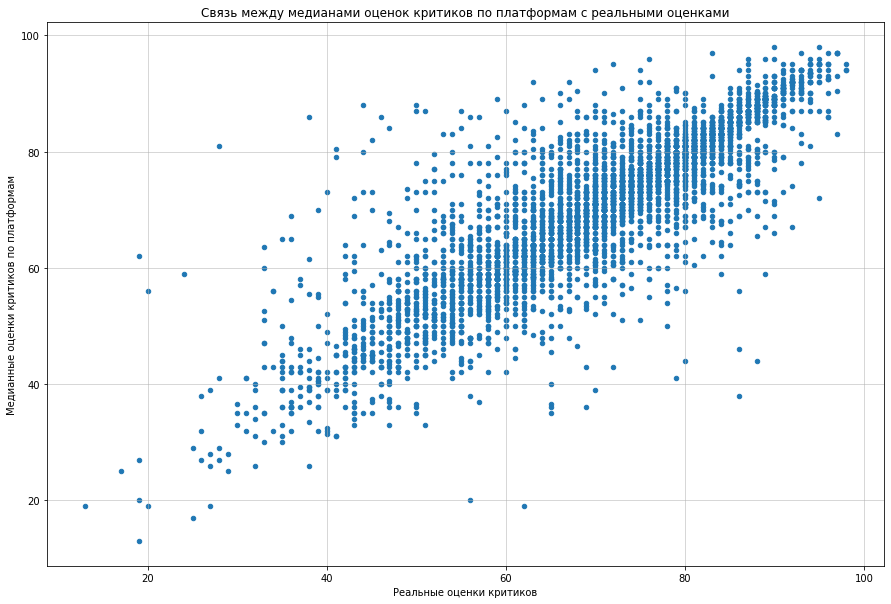

In [239]:
# Визуальная проверка гипотезы о том, что оценки игры критиками для разных платформ отличаются незначительно (на основе медианы)
duplicated_data.plot(kind='scatter', x='critic_score', y='critic_score_median', figsize=(15, 10))
plt.xlabel('Реальные оценки критиков')
plt.ylabel('Медианные оценки критиков по платформам')
plt.grid(linewidth=0.5)
plt.title('Связь между медианами оценок критиков по платформам с реальными оценками')
plt.show()

In [240]:
# Функция для получения среднего значения оценок критиков для игры по разным платформам
# row - (Series) Строка из набора данных
# возвращает - (int) Среднее значение оценок критиков для игры по разным платформам
def get_critic_score_mean(row):
    return data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['critic_score'].isnull() == False)
    ]['critic_score'].mean()

In [241]:
# Проверка гипотезы о том, что оценки игры критиками для разных платформ отличаются незначительно (на основе среднего)
duplicated_data['critic_score_mean'] = duplicated_data.apply(get_critic_score_mean, axis=1)

print('Степень корреляции между средними значениями оценок критиков по разным платформам с реальными оценками -', duplicated_data['critic_score_mean'].corr(duplicated_data['critic_score']))

Степень корреляции между средними значениями оценок критиков по разным платформам с реальными оценками - 0.8567540961323165


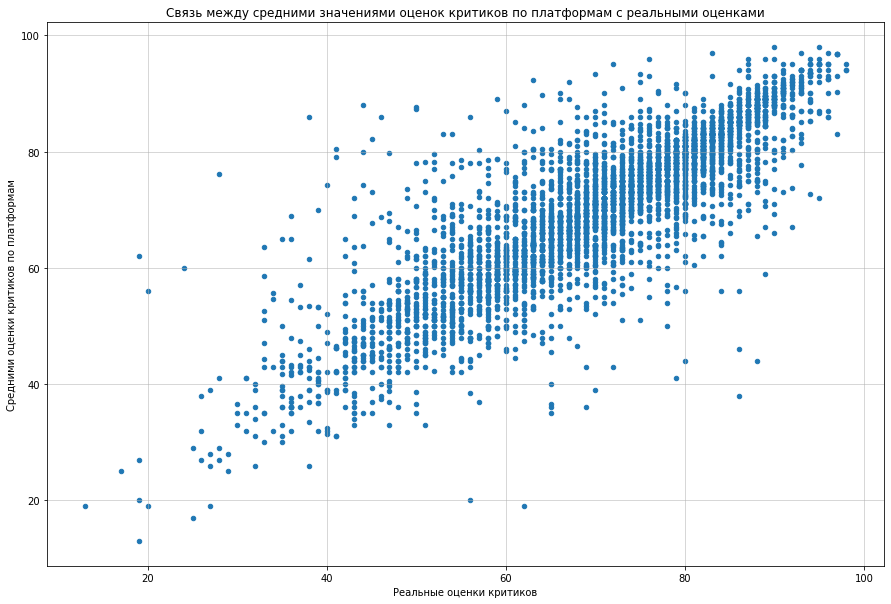

In [242]:
# Визуальная проверка гипотезы о том, что оценки игры критиками для разных платформ отличаются незначительно (на основе медианы)
duplicated_data.plot(kind='scatter', x='critic_score', y='critic_score_mean', figsize=(15, 10))
plt.xlabel('Реальные оценки критиков')
plt.ylabel('Cредними оценки критиков по платформам')
plt.grid(linewidth=0.5)
plt.title('Связь между средними значениями оценок критиков по платформам с реальными оценками')
plt.show()

In [243]:
# Заполнение пропусков на основе средних значений оценок игр критиками по платформам
data.loc[data['critic_score'].isnull(), 'critic_score'] = data[data['critic_score'].isnull()].apply(get_critic_score_mean, axis=1)

get_missing_values_proportion('critic_score')

Пропущенных значений - 7536 (45.47%)


### Проверка столбца user_score

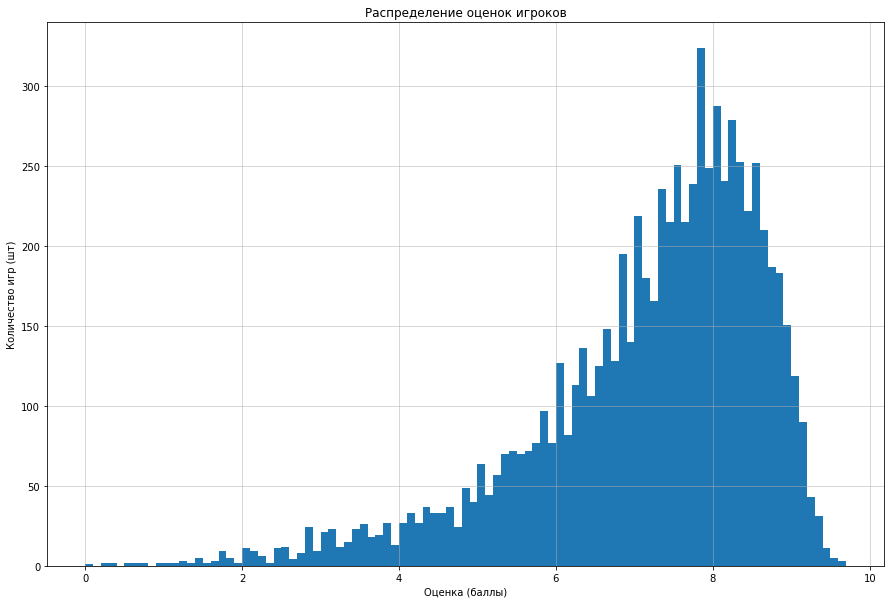

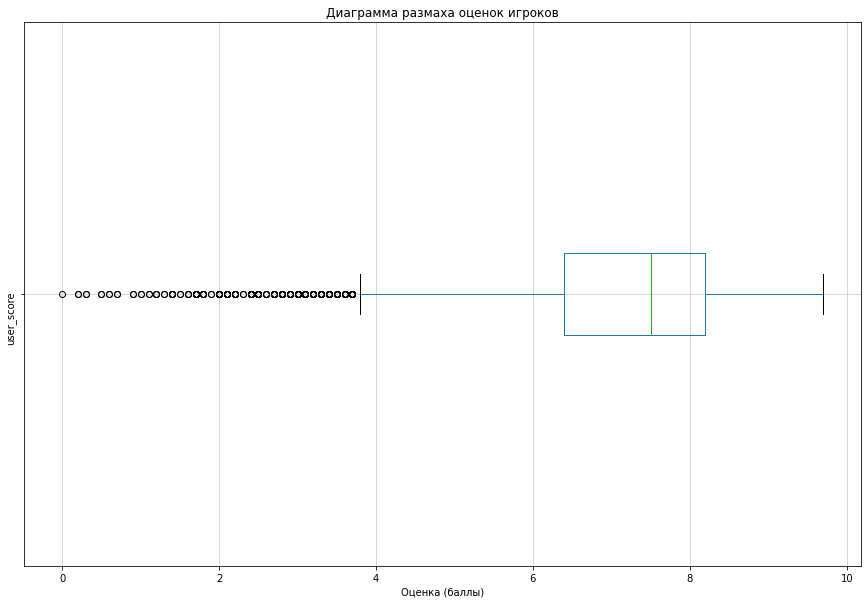

In [244]:
# Визуальная оценка распределения данных столбца
data['user_score'].hist(bins=97, figsize=(15, 10))
plt.xlabel('Оценка (баллы)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение оценок игроков')
plt.show()

data.boxplot(column='user_score', vert=False, figsize=(15, 10), rot=90)
plt.xlabel('Оценка (баллы)')
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха оценок игроков')
plt.show()

In [245]:
get_missing_values_proportion('user_score')

Пропущенных значений - 9032 (54.49%)


In [246]:
# Визуальная оценка записей с пропущенными значениями в столбце user_score
data[data['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [247]:
# Функция для получения медианы оценок пользователей по разным платформам для игры
# row - (Series) Строка из набора данных
# возвращает - (int) Медиана оценок пользователей для игры по разным платформам
def get_user_score_median(row):
    return data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['user_score'].isnull() == False)
    ]['user_score'].median()

In [248]:
# Сброс DataFrame с играми у которых есть порты на разных платформах - необходимо для работы со столбцом user_score после замены значений 'tbd'
duplicated_data = data[data['name'].isin(data[data['name'].duplicated()]['name'].unique())].copy()

duplicated_data.sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3358,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3120,007: Quantum of Solace,Wii,2008,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
9507,007: Quantum of Solace,DS,2008,Action,0.11,0.01,0.00,0.01,65.0,NaN,T
1285,007: Quantum of Solace,X360,2008,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
...,...,...,...,...,...,...,...,...,...,...,...
2583,pro evolution soccer 2011,PSP,2010,Sports,0.05,0.30,0.29,0.16,74.0,5.8,E
7149,pro evolution soccer 2011,Wii,2010,Sports,0.07,0.10,0.03,0.02,78.0,5.4,E
3304,pro evolution soccer 2011,X360,2010,Sports,0.09,0.44,0.00,0.07,79.0,5.9,E
8280,uDraw Studio: Instant Artist,Wii,2011,Misc,0.06,0.09,0.00,0.02,54.0,NaN,E


In [249]:
# Проверка гипотезы о том, что оценки игры пользователями для разных платформ отличаются незначительно (на основе медианы)
duplicated_data['user_score_median'] = duplicated_data.apply(get_user_score_median, axis=1)

print('Степень корреляции между медианами оценок пользователей по разным платформам с реальными оценками -', duplicated_data.query('user_score.isnull() == False')['user_score_median'].corr(duplicated_data.query('user_score.isnull() == False')['user_score']))

Степень корреляции между медианами оценок пользователей по разным платформам с реальными оценками - 0.6391723576394612


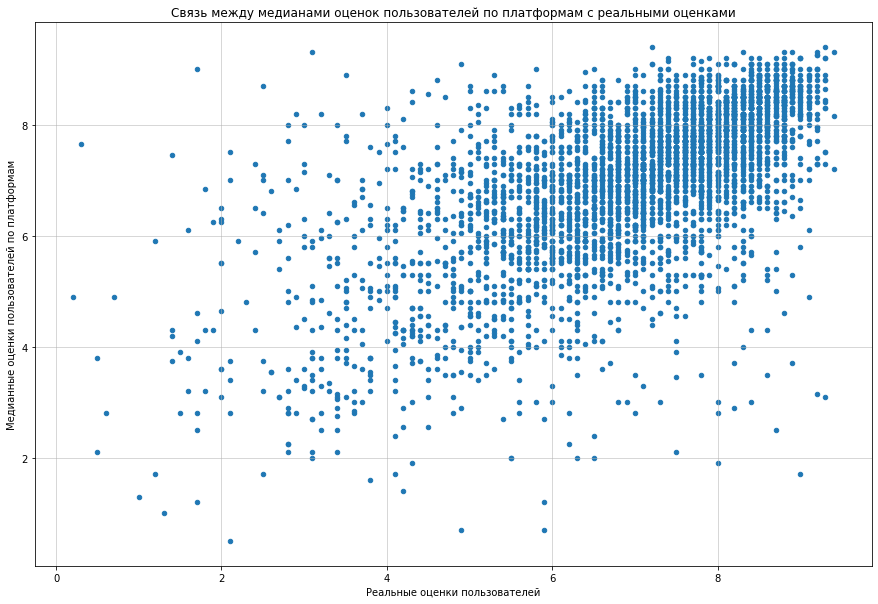

In [250]:
# Визуальная проверка гипотезы о том, что оценки игры пользвателями для разных платформ отличаются незначительно (на основе медианы)
duplicated_data.plot(kind='scatter', x='user_score', y='user_score_median', figsize=(15, 10))
plt.xlabel('Реальные оценки пользователей')
plt.ylabel('Медианные оценки пользователей по платформам')
plt.grid(linewidth=0.5)
plt.title('Связь между медианами оценок пользователей по платформам с реальными оценками')
plt.show()

In [251]:
# Функция для получения среднего значения оценок пользователей для игры по разным платформам
# row - (Series) Строка из набора данных
# возвращает - (int) Среднее значение оценок пользователей для игры по разным платформам
def get_user_score_mean(row):
    return data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['user_score'].isnull() == False)
    ]['user_score'].mean()

In [252]:
# Проверка гипотезы о том, что оценки игры критиками для разных платформ отличаются незначительно (на основе среднего)
duplicated_data['user_score_mean'] = duplicated_data.apply(get_user_score_mean, axis=1)

print('Степень корреляции между средними значениями оценок пользователей по разным платформам с реальными оценками -', duplicated_data['user_score_mean'].corr(duplicated_data['user_score']))

Степень корреляции между средними значениями оценок пользователей по разным платформам с реальными оценками - 0.647345508811507


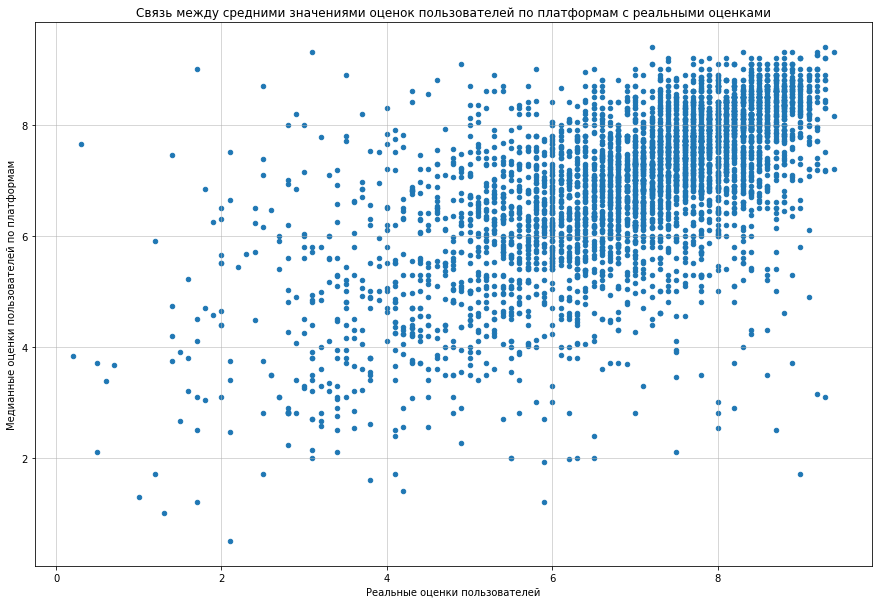

In [253]:
# Визуальная проверка гипотезы о том, что оценки игры критиками для разных платформ отличаются незначительно (на основе медианы)
duplicated_data.plot(kind='scatter', x='user_score', y='user_score_mean', figsize=(15, 10))
plt.xlabel('Реальные оценки пользователей')
plt.ylabel('Медианные оценки пользователей по платформам')
plt.grid(linewidth=0.5)
plt.title('Связь между средними значениями оценок пользователей по платформам с реальными оценками')
plt.show()

### Заполнение пропусков в столбце rating

In [255]:
data['rating'].value_counts()

E       3961
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

In [256]:
# Замена старого варианта рейтинга K-A на современный E
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

data['rating'].value_counts()

E       3964
T       2930
M       1554
E10+    1412
EC         8
RP         2
AO         1
Name: rating, dtype: int64

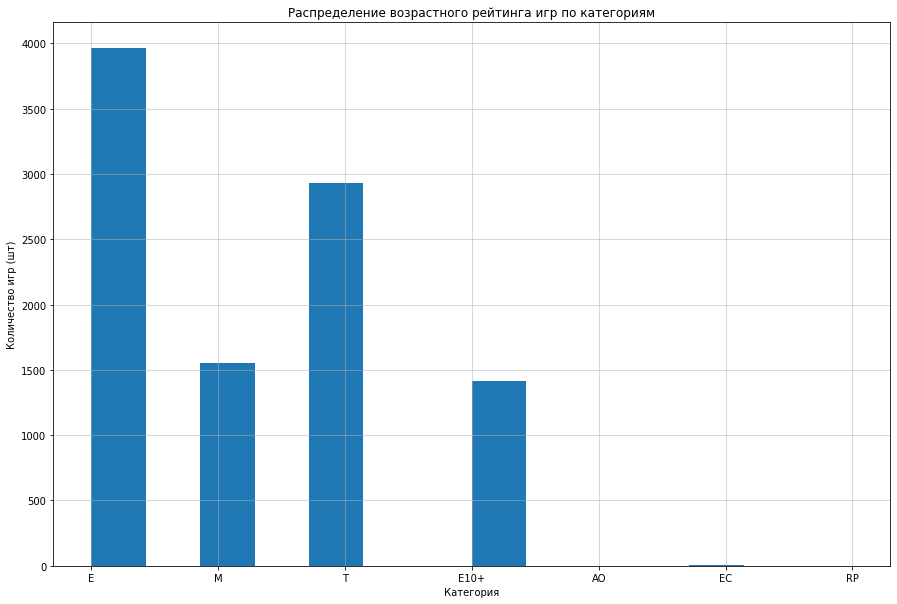

In [257]:
data['rating'].hist(bins=14, figsize=(15, 10))
plt.xlabel('Категория')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение возрастного рейтинга игр по категориям')
plt.show()

In [258]:
get_missing_values_proportion('rating')

Пропущенных значений - 6704 (40.45%)


In [259]:
# Функция для получения моды возрастного рейтинга по разным платформам для игры
# row - (Series) Строка из набора данных
# возвращает - (int) Мода возрастного рейтинга по разным платформам для игры
def get_rating_mode(row):
    mode = data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['rating'].isnull() == False)
    ]['rating'].mode()
    
    if len(mode) == 0:
        return np.NaN
    
    return mode[0]

In [260]:
# Заполнение пропусков на моды возрастного рейтинга игр по платформам
data.loc[data['rating'].isnull(), 'rating'] = data[data['rating'].isnull()].apply(get_rating_mode, axis=1)

get_missing_values_proportion('rating')

Пропущенных значений - 6267 (37.81%)


## Расчет суммарных продаж во всех регионах

In [261]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [262]:
print('Количество игр с суммарными продажами, равными 0 - {}'.format(len(data.query('sum_sales == 0'))))

Количество игр с суммарными продажами, равными 0 - 2


## Выводы (шаг 2)

Названия всех столбцов были приведены к нижнему регистру.<br /><br />

__Обработка пропусков и замена типа данных в столбцах__

В столбце __name__ удалено 2 пропуска ввиду невозможности их восстановления и малого количества. Предположительно, данные пропуски появились ввиду некорректного считывая имени при парсинге данных из первоисточника.

В столбце __year_of_release__ было обнаружен 269 (1.69% всех записей) пропусков. Предположительно, данные пропуски появились ввиду отсутствия данных в первоисточнике. 20 пропусков были заполнены путем получения года релиза игры из имени по формуле _(год\_в\_названии - 1)_. Такое заполнение обосновано тем, что в названия игры в жанре Sport принято вставлять год, следующий за годом выпуска игры. Еще 111 пропусков были заполнены, основываясь на том, что одна игра на разных платформах чаще всего выходит в один год (корреляция моды года выпуска одной игры для разных платформ с реальным годом выпуска у имеющихся значений на уровне 0.89). Оставшиеся 138 (0.83%) записей с пропусками были удалены ввиду их незначительного количества. Столбец был преобразован к целочисленному типу с целью экономии памяти.

В столбцах __na_sales__, __eu_sales__, __jp_sales__ и __other_sales__ было обнаружено, что значительное количество значений, равных 0, является следствием
- округления значений до 10 тыс. в меньшую сторону и значительного количества игр с продажами на сумму менее &#0036;10 тыс. (инди-игры, ранний доступ и т.п.) в конкретном регионе;
- отсутсвтия продаж у игры в конкретном регионе - это подтверждается тем, что только у 2 игр суммарные продажи во всех регионах равны 0.
    
Распределение данных без учета нулевых значений напоминает Пуассоновское. Предположительно, если бы игры с маленькими продажами имели точные значения, то данные имели бы Пуассоновское распределение.

В столбцах __critic_score__ и __user_score__ было обнаружено 8496 (51.26% всех записей) и 9032 (54.49% всех записей) пропусков, соответственно. Оценки критиков и пользователей были выгружены с веб-сайта Metacritic. Значительная часть оценок отсутствует по следующим причинам:
- На Metacritic отсутсвуют игровые платформы, которые были распространены до 2000 года, поэтому данных по этим играм нет;
- На Metacritic имеются не все игры, выпускаемые в мире, поэтому для них также нет оценок;
- Игры, скорее всего, парсились по ссылкам на страницы Metacritic. Поэтому, если ссылка на Metacritic имеет отличия от названия игры в данных, то оценки не считывались. Например:
    - Название игры "Call of Duty: Black Ops II" соответствует ссылке на Metacritic (https://www.metacritic.com/game/pc/call-of-duty-black-ops-ii) и оценка игры считалась;
    - Название игры "Call of Duty: Black Ops 3" отличается ("3" и "III") от ссылки на Metacritic (https://www.metacritic.com/game/pc/call-of-duty-black-ops-iii) и оценка игры не считалась.
- В столбце __user_score__ также присутствовали значения "tbd", которые расшифровываются как "to be determined". Для игр с такой оценкой не хватает пользовательских оценок, чтобы по правилам Metacritic установить рейтинг (https://www.metacritic.com/faq#item13). Эти значения были заменены на NaN.

В столбце __critic_score__ было заполнено 960 пропусков основываясь на том, что одна игра на разных платформах чаще всего имеет схожую оценку критиков (корреляция среднего значения оценки критиков одной игры для разных платформ с реальной оценкой у имеющихся значений на уровне 0.86). Пользовательские оценки заполнить, основываясь на этом же предположении, не удалось, так как оказалось, что оценки одной игры на разных платформах могут значительно отличаться (корреляция на уровне 0.63). Предположительно, это обусловлено тем, что при оценке игры критики в меньшей степени обращают внимание на такие аспекты, как графическая составляющая игры, оптимизация и т.п. Но данная гипотеза требует проверки в отдельном исследовании. Оставшиеся пропуски в столбцах не подлежат заполнению ввиду отсутствия каких-либо источников для этого. Удаление этих данных также не допустимо ввиду их значительного количества.

Исходя из графиков, описывающих какая часть игр за каждый год не имеет оценок можно сделать следующие выводы:
- начиная с 2000 года количество игр без оценок резко падает до 25%, а потом растет и стабилизируется около 55% (хотя, тут надо наблюдать дальше). Предположительно, к концу периода стало слишком много игр, чтоб писать на них обзоры;
- предположительно, просадка до 25% в 2000-х - это не просадка, а часть роста - возможно, если бы была статистика по всем платформам, то мы бы увидели постепенный рост процента отсутствия оценок в связи с ростом количества игр. Но данная гипотеза требует проверки в отдельном исследовании.

В столбце __rating__ 3 записи имели значение "K-A" и были заменены на современный вариант данного типа рейтинга - "E". Также было обнаружено 6704 (40.45% всех записей) пропусков. Пропуски в данных обусловлены теми же причинами, что и пропуски в оценках игр. 437 пропусков было, основываясь на том, что одна игра на разных платформах должна иметь одинаковый возрастной рейтинг. Оставшиеся пропуски в столбцах не подлежат заполнению ввиду отсутствия каких-либо источников для этого. Удаление этих данных также не допустимо ввиду их значительного количества.<br /><br />

Также были рассчитаны суммарные продажи во всех регионах для каждой игры.

# Шаг 3. Исследовательский анализ данных

## Cколько игр выпускалось в разные годы

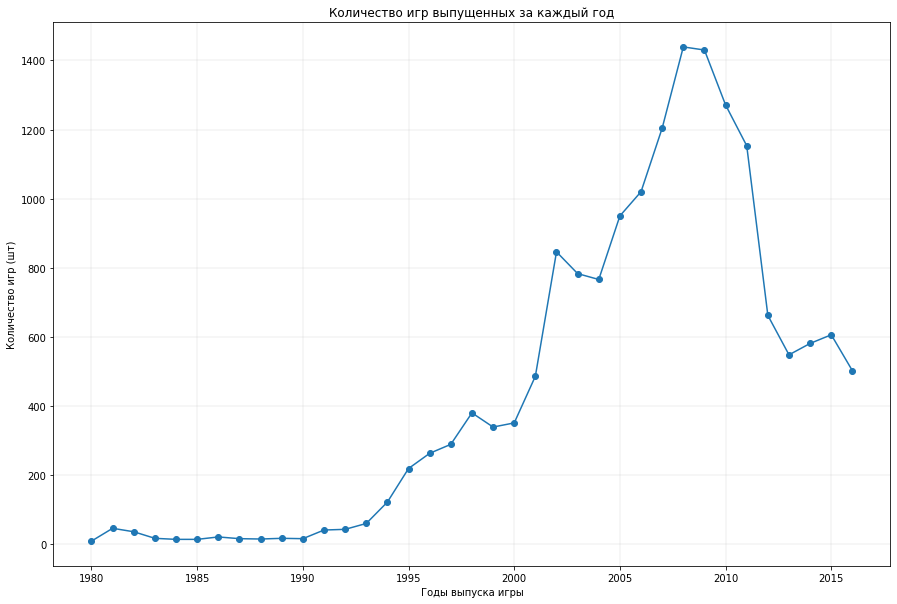

In [263]:
data.groupby('year_of_release')['name'].count().plot(style='o-', figsize=(15, 10))
plt.xlabel('Годы выпуска игры')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.2)
plt.title('Количество игр выпущенных за каждый год')
plt.show()

## Как менялись продажи игр по платформам

In [264]:
# Расчет суммарных продаж для каждой платформы
sales_by_platform = data.groupby('platform')['sum_sales'].sum()

sales_by_platform.head()

platform
2600     89.01
3DO       0.10
3DS     258.53
DC       15.95
DS      804.28
Name: sum_sales, dtype: float64

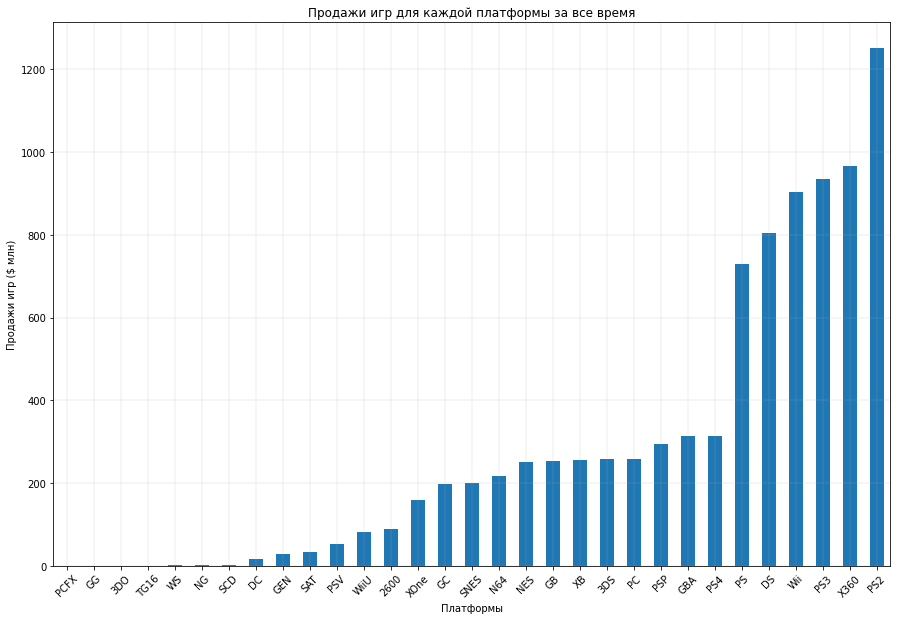

In [265]:
sales_by_platform.sort_values().plot.bar(rot=45, figsize=(15, 10))
plt.xlabel('Платформы')
plt.ylabel('Продажи игр ($ млн)')
plt.grid(linewidth=0.2)
plt.title('Продажи игр для каждой платформы за все время')
plt.show()

In [266]:
# Составление списка платформ с наибольшим количеством продаж
highest_sales_platforms = list(sales_by_platform[sales_by_platform > 600].index)

highest_sales_platforms

['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']

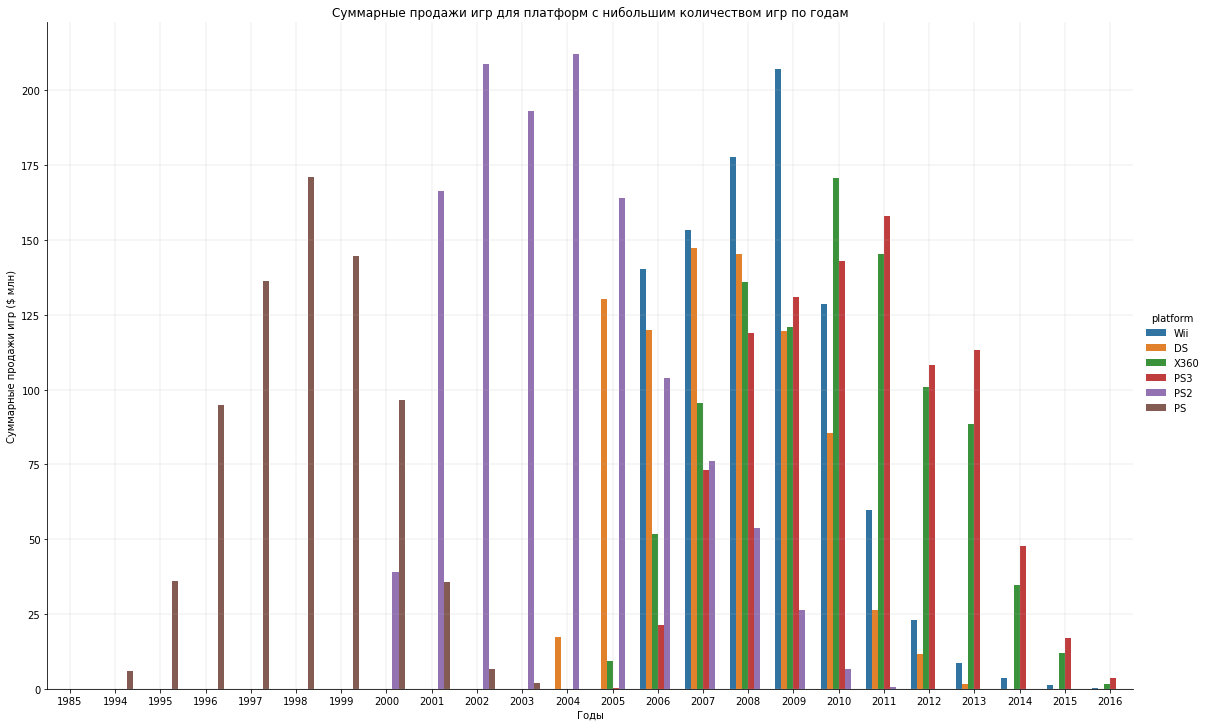

In [267]:
sns.catplot(
    kind='bar',
    data=data.query('platform in @highest_sales_platforms'),
    x='year_of_release',
    y='sum_sales',
    hue='platform',
    height=10,
    aspect=1.6,
    ci=None,
    estimator=sum);
plt.xlabel('Годы')
plt.ylabel('Суммарные продажи игр ($ млн)')
plt.grid(linewidth=0.2)
plt.title('Суммарные продажи игр для платформ с нибольшим количеством игр по годам')
plt.show()

In [268]:
# Определение аномалии в 1985 году
data.query('platform in @highest_sales_platforms and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [269]:
# Исправление неверного значения
data.loc[data['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2007

## Отделение данных за актуальный период

In [295]:
actual_data = data.copy().loc[data['year_of_release'] >= 2012]

actual_data['year_of_release'].unique()

array([2013, 2015, 2012, 2014, 2016])

## Какие платформы лидируют по продажам, растут или падают

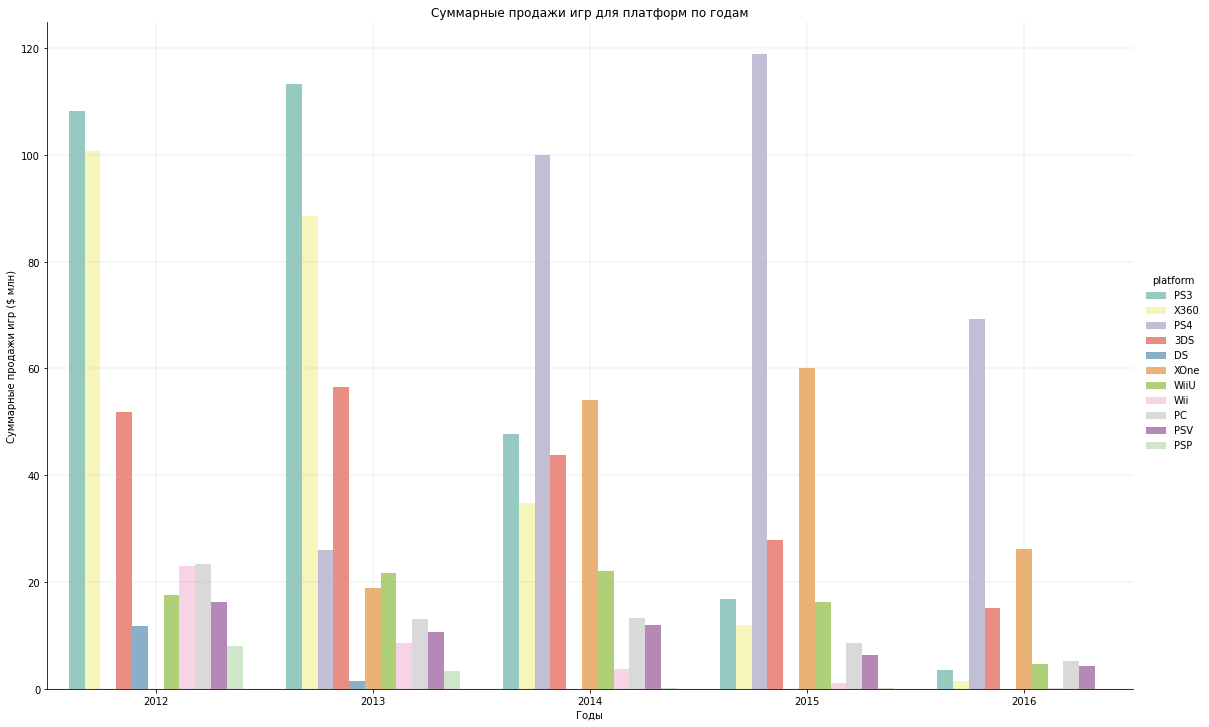

In [296]:
sns.catplot(
    kind='bar',
    data=actual_data,
    x='year_of_release',
    y='sum_sales',
    hue='platform',
    height=10,
    aspect=1.6,
    ci=None,
    estimator=sum,
    palette='Set3');
plt.xlabel('Годы')
plt.ylabel('Суммарные продажи игр ($ млн)')
plt.grid(linewidth=0.2)
plt.title('Суммарные продажи игр для платформ по годам')
plt.show()

## График «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам

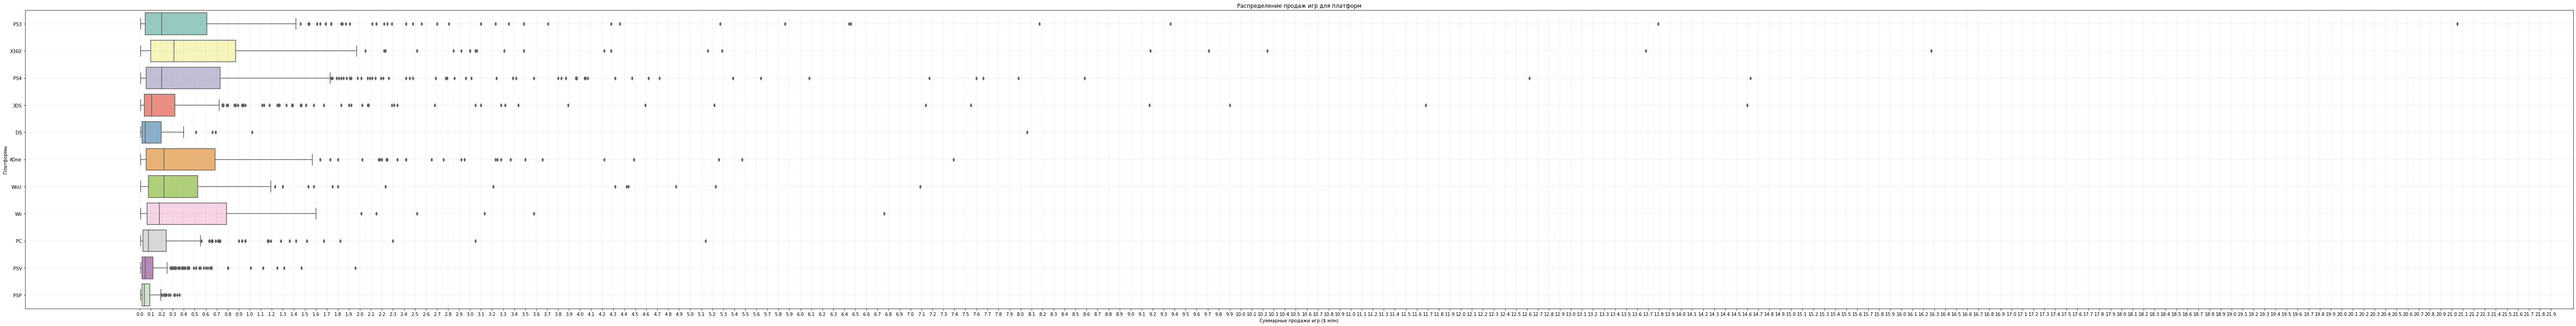

In [297]:
plt.figure(figsize=(100, 12))
sns.boxplot(y="platform", x="sum_sales", data=actual_data, palette='Set3', orient="h")
plt.xticks(np.arange(0, 22, step=0.1))
plt.ylabel('Платформы')
plt.xlabel('Суммарные продажи игр ($ млн)')
plt.grid(linewidth=0.2)
plt.title('Распределение продаж игр для платформ')
plt.show()

In [298]:
# Уточнение статистических показателей
actual_data.query('platform == "PSP"')['sum_sales'].describe()

count    175.000000
mean       0.066800
std        0.073594
min        0.010000
25%        0.020000
50%        0.040000
75%        0.090000
max        0.360000
Name: sum_sales, dtype: float64

In [299]:
# Уточнение статистических показателей
actual_data.query('platform == "X360"')['sum_sales'].describe()

count    294.000000
mean       0.807891
std        1.706880
min        0.010000
25%        0.100000
50%        0.310000
75%        0.870000
max       16.270000
Name: sum_sales, dtype: float64

## Как влияют на продажи игр Sony PlayStation 4 отзывы пользователей и критиков

In [300]:
ps4_data = actual_data.loc[actual_data['platform'] == 'PS4']

ps4_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


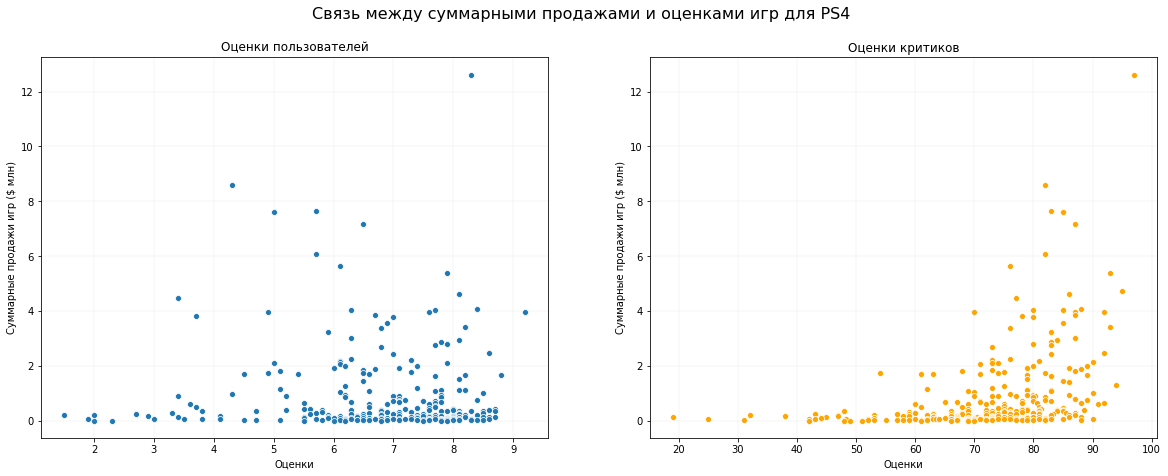

In [301]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)

sns.scatterplot(y="sum_sales", x="user_score", data=ps4_data, ax=ax1)
sns.scatterplot(y="sum_sales", x="critic_score", data=ps4_data, ax=ax2, color='orange')

fig.suptitle('Связь между суммарными продажами и оценками игр для PS4', fontsize=16)

ax1.set_xlabel('Оценки')
ax1.set_ylabel('Суммарные продажи игр ($ млн)')
ax1.grid(linewidth=0.1)
ax1.set_title('Оценки пользователей')

ax2.set_xlabel('Оценки')
ax2.set_ylabel('Суммарные продажи игр ($ млн)')
ax2.grid(linewidth=0.1)
ax2.set_title('Оценки критиков')
plt.show()

In [302]:
print('Корреляция между суммарными продажами и оценками пользователей - {:.2}'.format(ps4_data['sum_sales'].corr(ps4_data['user_score'])))
print('Корреляция между суммарными продажами и оценками пользователей - {:.3}'.format(ps4_data['sum_sales'].corr(ps4_data['critic_score'])))

Корреляция между суммарными продажами и оценками пользователей - -0.032
Корреляция между суммарными продажами и оценками пользователей - 0.392


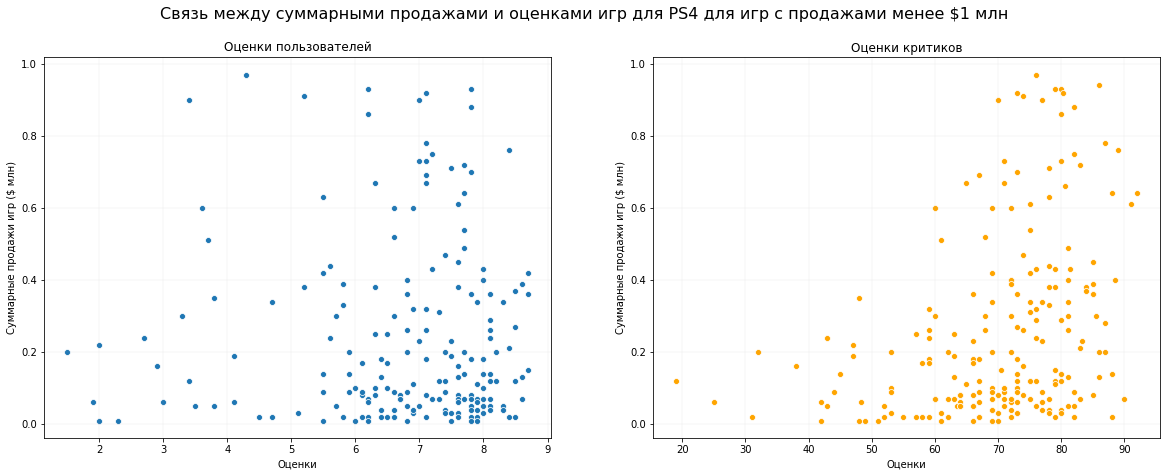

In [303]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)

sns.scatterplot(y="sum_sales", x="user_score", data=ps4_data.query('sum_sales < 1'), ax=ax1)
sns.scatterplot(y="sum_sales", x="critic_score", data=ps4_data.query('sum_sales < 1'), ax=ax2, color='orange')

fig.suptitle('Связь между суммарными продажами и оценками игр для PS4 для игр с продажами менее $1 млн', fontsize=16)

ax1.set_xlabel('Оценки')
ax1.set_ylabel('Суммарные продажи игр ($ млн)')
ax1.grid(linewidth=0.1)
ax1.set_title('Оценки пользователей')

ax2.set_xlabel('Оценки')
ax2.set_ylabel('Суммарные продажи игр ($ млн)')
ax2.grid(linewidth=0.1)
ax2.set_title('Оценки критиков')
plt.show()

In [304]:
print('Корреляция между суммарными продажами и оценками пользователей для игр с продажами менее $1 млн - {:.2}'.format(ps4_data.query('sum_sales < 1')['sum_sales'].corr(ps4_data.query('sum_sales < 1')['user_score'])))
print('Корреляция между суммарными продажами и оценками пользователей для игр с продажами менее $1 млн - {:.3}'.format(ps4_data.query('sum_sales < 1')['sum_sales'].corr(ps4_data.query('sum_sales < 1')['critic_score'])))

Корреляция между суммарными продажами и оценками пользователей для игр с продажами менее $1 млн - -0.012
Корреляция между суммарными продажами и оценками пользователей для игр с продажами менее $1 млн - 0.344


## Распределение игр и продаж по жанрам

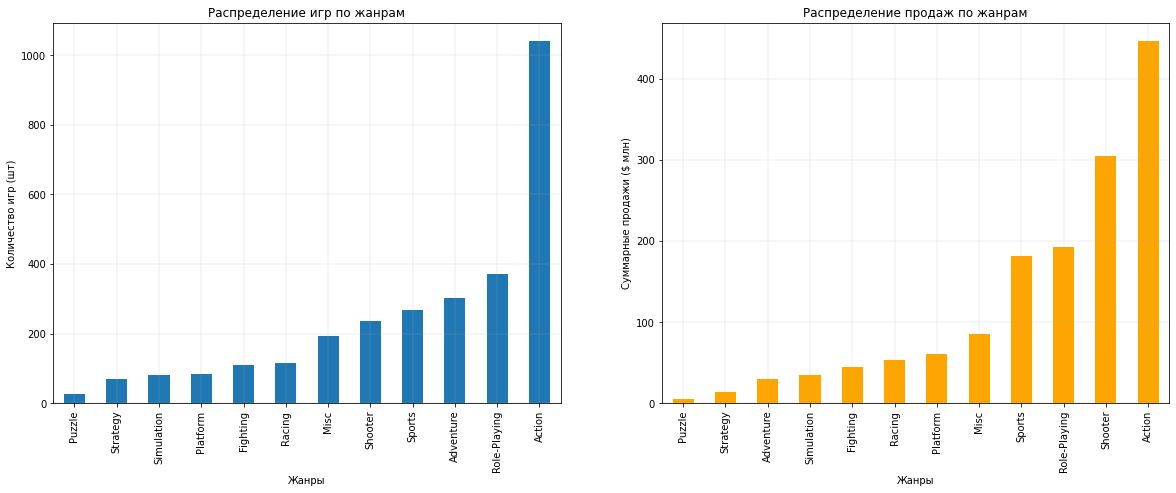

In [305]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)

actual_data.groupby('genre')['name'].count().sort_values().plot.bar(ax=ax1)
actual_data.groupby('genre')['sum_sales'].sum().sort_values().plot.bar(ax=ax2, color='orange')

ax1.set_xlabel('Жанры')
ax1.set_ylabel('Количество игр (шт)')
ax1.grid(linewidth=0.2)
ax1.set_title('Распределение игр по жанрам')

ax2.set_xlabel('Жанры')
ax2.set_ylabel('Суммарные продажи ($ млн)')
ax2.grid(linewidth=0.2)
ax2.set_title('Распределение продаж по жанрам')
plt.show()

## Выводы (шаг 3)

__Cколько игр выпускалось в разные годы__

Исходя из графика количества выпущенных игр за каждый год можно сделать вывод, что актуальным является период начиная с 2012 года, т.к. количество игр значительно (примерно в 2 раза) снизилось по сравнению с предыдущими 5-7 годами.<br /><br />

__Как менялись продажи игр по платформам__

Исходя из распределения продаж игр по платформам можно сделать вывод, что платформами с наибольшим количеством продаж (более &#0036;700 млн для каждой платформы) являются - Nintendo DS и Wii, Sony PlayStation 1, 2 и 3 и Microsoft Xbox 360.

Исходя из распределения продажи игр по годам для каждой из этих платформ можно сделать вывод, что в среднем жизненный цикл платформы составляет 11 лет, а новые поколения платформ появляются примерно раз в 7 лет.<br /><br />

__Отделение данных за актуальный период__

Исходя из предыдущих выводов можно сделать заключение, что актуальным временным периодом является период с 2012 и 2016 год, т.к. он включает в себя последнее поколению консолей (Sony PlayStation 4, Microsoft Xbox One и Nintendo Wii U) и имеет примерно одинаковые объемы выпущенных игр. Далее все действия будут проводиться для данных за этот период.<br /><br />

__Какие платформы лидируют по продажам, растут или падают__

Исходя из распределения суммарных продаж игр для платформ по годам можно сделать следующие выводы:
- К 2016 году по суммарным продажам лидирует Sony PlayStation 4;
- У платформ Sony PlayStation 4 и Microsoft Xbox One наблюдается рост продаж (не учитывая 2016 год, данные для которого могут быть не полными);
- Продажи всех остальных платформ падают. Особенно это заметно для Sony PlayStation 3, Microsoft Xbox 360 и Nintendo Wii, жизненный цикл которых заканчивается;
- Потенциально прибыльными платформами можно назвать:
    - Sony PlayStation 4 и Microsoft Xbox One - у них наблюдается рост продаж, на них имеет смысл делать акцент;
    - Nintendo 3DS и Wii U и Sony PlayStation Vita - у них еще не закончился жизненный цикл, но продажи будут значительно меньше, чем у Sony PlayStation 4 и Microsoft Xbox One;
    - PC - стабильно имеет некоторый процент продаж и не имеет конца жизненного цикла.<br /><br />
    
__График «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам__

Суммарные продажи для игр на разных платформах имеют значительные различия:
- Самые маленькие суммарные продажи по играм на платформе Sony PlayStation Portable - медиана равна 40 тыс., верхний квартиль - 90 тыс., а верхний "ус" находится около 200 тыс.;
- Самые большие суммарные продажи по играм на платформе Microsoft Xbox 360 - медиана равна 310 тыс., верхний квартиль - 870 тыс., а верхний "ус" находится около 1.95 млн.;
- Консоли, на мой взгляд, можно разделить на 3 категории:
    
    
    1) Домашние консоли. Они имеют медианы около 200 тыс. (кроме Microsoft Xbox 360), верхние квартили 500-900 тыс. и верхние "усы" от 1.2 до 2 млн. Самые маленькие суммарные продажи из них у Nintendo Wii U, самые больше - у Microsoft Xbox 360. У этих консолей самые большие продажи;
    2) Портативные консоли Sony. Они имеют медианы около 50 тыс., верхние квартили около 100 тыс. и верхние "усы" от 200 - 250 тыс. У этих консолей самые маленький продажи.
    3) Портативные консоли Nintendo. Они имеют медианы около 100 тыс., верхние квартили около 200-300 тыс. и верхние "усы" от 400 - 700 тыс. У этих консолей продажи значительно ниже, чем у домашних консолей, но выше, чем у портативных консолей Sony.

- Отдельно можно выделить PC, которые по продажам близки к портативным консолям Nintendo;
- Большинство платформ имеют значительное количество аутлаеров, большинство из которых лежит в области до 5 млн., но некоторые доходят до 20 млн.
- Также можно заметить, что у последнего поколения консолей Sony и портативных консолей Nintendo продажи игр в среднем выросли, по сравнению с предыдущим поколением, а у Xbox и Wii упали.<br /><br />

__Как влияют на продажи игр Sony PlayStation 4 отзывы пользователей и критиков__

Исходя из уровней корреляции можно сделать вывод, что оценки критиков не очень сильно влияют на продажи игр на PS4, а оценки пользователей вообще не влияют. Но на построенных диаграммах рассеяния можно заметить тенденцию для оценок критиков (в значительно меньшей степени для оценок пользователей), что игры с продажами более 200 тыс. имеют рейтинг более 60 баллов, а с продажами более 1 млн. - более 70 баллов.<br /><br />

__Соотнесите выводы с продажами игр на других платформах__

Можно ожидать, что выводы по PS4 можно применить к другим платформам, но суммы продаж для границ в 60 и 70 баллов будут отличаться в зависимости от средних продаж по платформе.<br /><br />

__Распределение игр и продаж по жанрам__

Исходя из построенных распределений видно:
- Жанр Action является безоговорочным лидером как по количеству игр (более 1000), так и по сумме продаж (около 450 млн.);
- Наименее популярными жанрами (по количеству игр и продажам) являются Puzzle и Strategy, которые требуют значительно больше умственных затрат, чем остальные жанры;
- Также выделяется жанр Shooter, который имеет в 4 раза меньше игр (чуть более 200), чем жанр Action, но продажи имеет лишь на $\frac{1}{3}$ меньше (более 300 млн.);
- Жанр Adventure наоборот имеет относительное большое количество игр (около 300), но по продажам находится на 3 с конца месте (около 30 млн.);
- По количеству продаж также можно выделить жанры Sports и Role-Playing, которые делают значительный "рывок" (около 200 млн. против менее 100 млн. у других жанров) в продажах по сравнению с менее продаваемыми жанрами.

# Шаг 4. Составление портрета пользователя каждого региона

## Самые популярные платформы

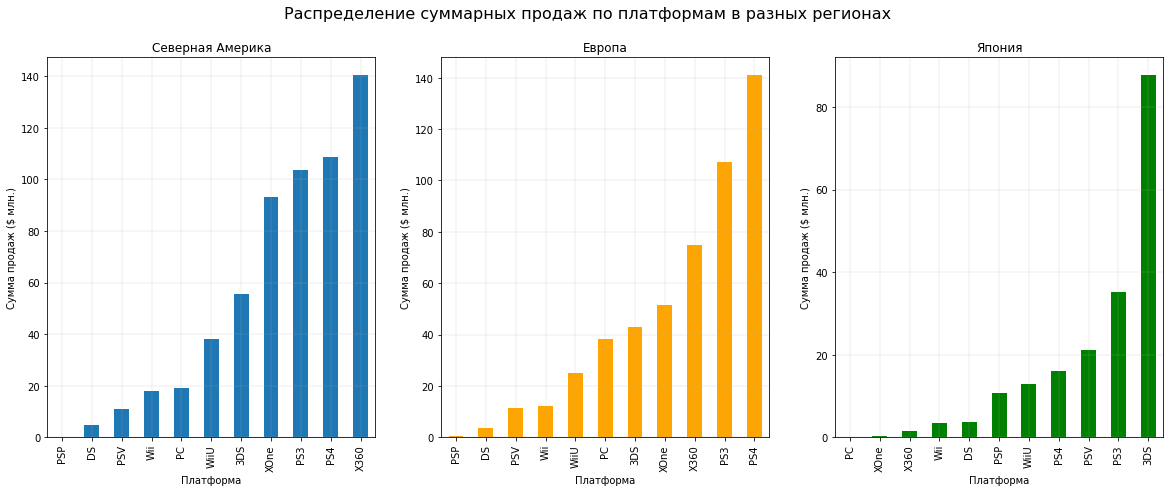

In [306]:
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(20, 7)
)

actual_data.groupby('platform')['na_sales'].sum().sort_values().plot.bar(ax=ax1)
actual_data.groupby('platform')['eu_sales'].sum().sort_values().plot.bar(ax=ax2, color='orange')
actual_data.groupby('platform')['jp_sales'].sum().sort_values().plot.bar(ax=ax3, color='green')

fig.suptitle('Распределение суммарных продаж по платформам в разных регионах', fontsize=16)

ax1.set_xlabel('Платформа')
ax1.set_ylabel('Сумма продаж ($ млн.)')
ax1.grid(linewidth=0.2)
ax1.set_title('Северная Америка')

ax2.set_xlabel('Платформа')
ax2.set_ylabel('Сумма продаж ($ млн.)')
ax2.grid(linewidth=0.2)
ax2.set_title('Европа')

ax3.set_xlabel('Платформа')
ax3.set_ylabel('Сумма продаж ($ млн.)')
ax3.grid(linewidth=0.2)
ax3.set_title('Япония')
plt.show()

## Самые популярные жанры

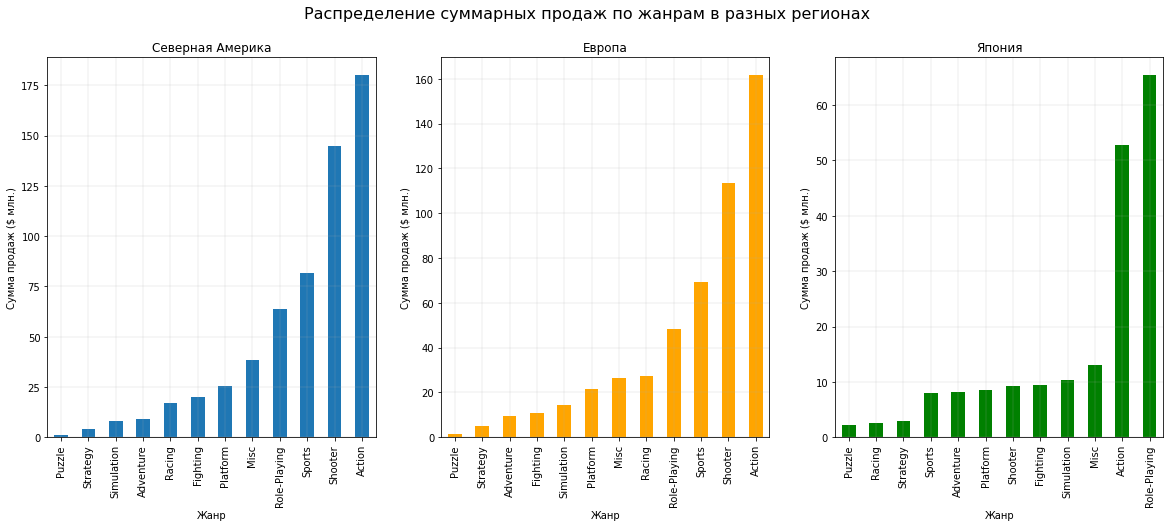

In [307]:
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(20, 7)
)

actual_data.groupby('genre')['na_sales'].sum().sort_values().plot.bar(ax=ax1)
actual_data.groupby('genre')['eu_sales'].sum().sort_values().plot.bar(ax=ax2, color='orange')
actual_data.groupby('genre')['jp_sales'].sum().sort_values().plot.bar(ax=ax3, color='green')

fig.suptitle('Распределение суммарных продаж по жанрам в разных регионах', fontsize=16)

ax1.set_xlabel('Жанр')
ax1.set_ylabel('Сумма продаж ($ млн.)')
ax1.grid(linewidth=0.2)
ax1.set_title('Северная Америка')

ax2.set_xlabel('Жанр')
ax2.set_ylabel('Сумма продаж ($ млн.)')
ax2.grid(linewidth=0.2)
ax2.set_title('Европа')

ax3.set_xlabel('Жанр')
ax3.set_ylabel('Сумма продаж ($ млн.)')
ax3.grid(linewidth=0.2)
ax3.set_title('Япония')

plt.show()

## Влияние рейтинга ESRB на продажи

In [308]:
def rating_to_number(rating):
    if rating == 'E':
        return 0
    
    if rating == 'E10+':
        return 1
    
    if rating == 'T':
        return 2
    
    return 3

In [309]:
actual_data.loc[:, 'rating_as_number'] = actual_data[actual_data['rating'].isnull() == False]['rating'].apply(rating_to_number)

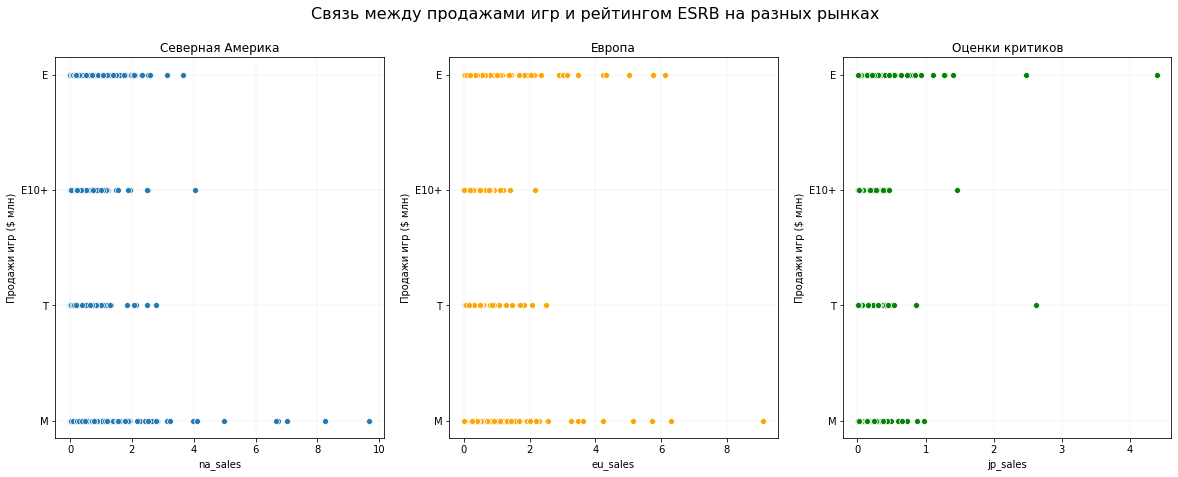

In [311]:
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(20, 7)
)

sns.scatterplot(x="na_sales", y="rating", data=actual_data.query('na_sales > 0').sort_values('rating_as_number', ascending=False), ax=ax1)
sns.scatterplot(x="eu_sales", y="rating", data=actual_data.query('eu_sales > 0').sort_values('rating_as_number', ascending=False), ax=ax2, color='orange')
sns.scatterplot(x="jp_sales", y="rating", data=actual_data.query('jp_sales > 0').sort_values('rating_as_number', ascending=False), ax=ax3, color='green')

fig.suptitle('Связь между продажами игр и рейтингом ESRB на разных рынках', fontsize=16)

ax1.set_ylabel('Рейтинг')
ax1.set_ylabel('Продажи игр ($ млн)')
ax1.grid(linewidth=0.1)
ax1.set_title('Северная Америка')

ax2.set_ylabel('Рейтинг')
ax2.set_ylabel('Продажи игр ($ млн)')
ax2.grid(linewidth=0.1)
ax2.set_title('Европа')

ax3.set_ylabel('Япония')
ax3.set_ylabel('Продажи игр ($ млн)')
ax3.grid(linewidth=0.1)
ax3.set_title('Оценки критиков')
plt.show()

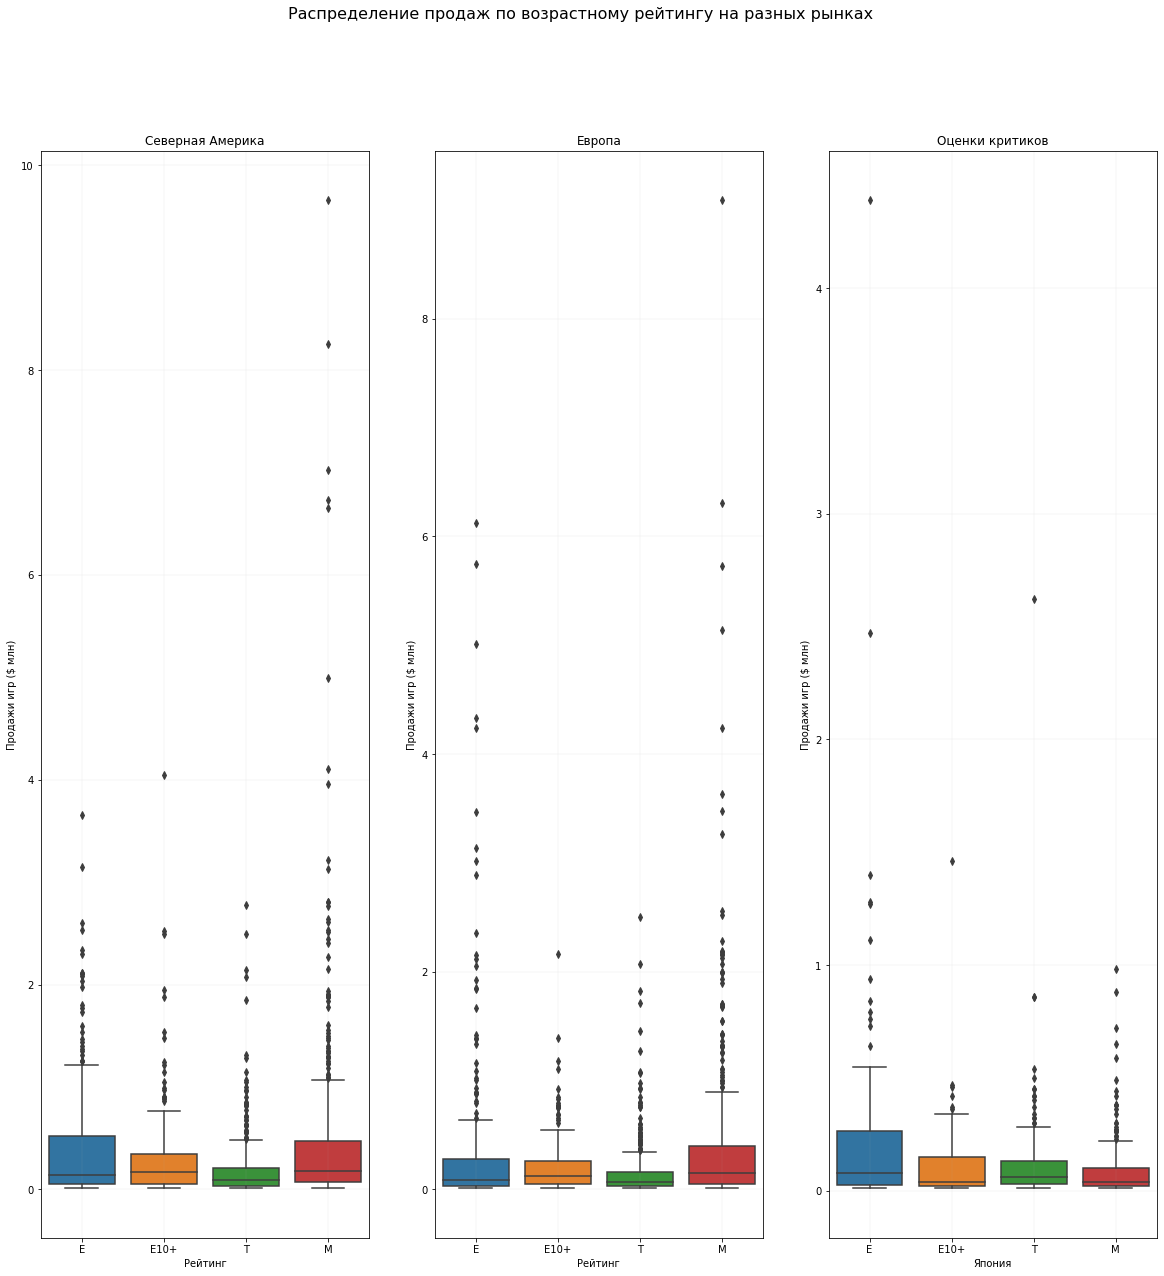

In [312]:
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(20, 20)
)

sns.boxplot(y="na_sales", x="rating", data=actual_data.query('na_sales > 0').sort_values('rating_as_number'), orient='v', ax=ax1)
sns.boxplot(y="eu_sales", x="rating", data=actual_data.query('eu_sales > 0').sort_values('rating_as_number'), orient='v', ax=ax2)
sns.boxplot(y="jp_sales", x="rating", data=actual_data.query('jp_sales > 0').sort_values('rating_as_number'), orient='v', ax=ax3)

fig.suptitle('Распределение продаж по возрастному рейтингу на разных рынках', fontsize=16)

ax1.set_xlabel('Рейтинг')
ax1.set_ylabel('Продажи игр ($ млн)')
ax1.grid(linewidth=0.1)
ax1.set_title('Северная Америка')

ax2.set_xlabel('Рейтинг')
ax2.set_ylabel('Продажи игр ($ млн)')
ax2.grid(linewidth=0.1)
ax2.set_title('Европа')

ax3.set_xlabel('Япония')
ax3.set_ylabel('Продажи игр ($ млн)')
ax3.grid(linewidth=0.1)
ax3.set_title('Оценки критиков')
plt.show()

## Выводы (шаг 4)

__Самые популярные платформы__

Для Северной Америки и Европы ТОП-5 популярных платформ состоит и одних и тех же консолей - PS3, PS4, Xbox 360, Xbox One и Nintendo 3DS. В Северной Америке лидирует домашняя для рынка консоль Xbox 360, а в Европе доминируют консоли Sony. На 5 месте в обоих регионах находится Nintendo 3DS. В Японии же в ТОП-5 входят лишь японские консоли в следующем порядке (по убыванию продаж) - Nintendo 3DS, PS3, PS Vita, PS4 и Wii U. Причем Nintendo 3DS более чем в 2 раза опережает PS3 (85 против 35 млн., соответсвтенно). Из этого можно сделать вывод, что пользователи предпочитаю платформы отечественных производителей, а в Европе, где нет таких консолей лидирует популярная по всему миру PlayStation. Исключение составляет только Xbox One в Северной Америке, но его сумма продаж не столь значительно отличается  от продаж домашних консолей Sony.<br /><br />

__Самые популярные платформы__

Для Северной Америки и Европы ТОП-4 популярных жанров идентичен:

    1) Action
    2) Shooter
    3) Sports
    4) Role-Playing

5-ое место в Северной Америке занимает жанр Misc, а Европе Racing, но жанр Misc в Европе практически не отстает от Racing. В японии же ТОП-5 жанров кардинально отличается:

    1) Role-Playing
    2) Action
    3) Misc
    4) Simulation
    5) Fightning
    
Причем, жанры Role-Playing и Action безоговорочно доминируют (65 и 55 млн., соответственно, против 10 млн. у остальных жанров). Это отличие Японии от Северной Америки и Европы объясняется спецификой японской культуры, в которой популярны такие культурные явления как покемоны и манга и аниме в принципе. А большинство игр связанных с этими явлениями выходят в жанрах Role-Playing и Action.<br /><br />

__Влияние рейтинга ESRB на продажи__

Исходя из построенных диаграмм рассеяния и размаха можно сделать вывод, что во всех регионах связь продаж и рейтинга схожа и ее можно описать следующим образом:
- Медианны продаж для рейтингов отличаются незначительно, но вот верхние планки (верхний квартиль, верхний "ус" и значения аутлаеров) уменьшаются от самого "детского" рейтинга Е к более взрослому T. Причем в Европе это отличие самое маленькое.;
- Рейтинг для взрослых M имеет продажи на уровне E в Северной Америке и несколько большие значения чем у игр с рейтингом Е в Европе. А вот в Японии игры с таким рейтингом имеют продажи еще меньше, чем игры с рейтингом T. 

Из этого можно сделать следующие выводы:
- В Японии игры для взрослых людей пользуются меньшей популярностью чем в других регионах и чем все остальные игры в Японии - с отсутствием не завуалированного насилия, нецензурной лексики и т.п.
- В Европе наибольшую популярность имеют игры для взрослых;
- В Северной Америке - игры для взрослых и для всех возрастов;
- В Японии - игры для всех возрастов.

# Шаг 5. Проверка гипотез

In [313]:
# Установка порога значимости
alpha = .05

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [314]:
# Подготовка датасета, где присутсвуют только игры, которые есть на обеих платформах
xone_pc_data = actual_data.dropna(subset=['user_score']).query('platform == "XOne" or platform == "PC"')

xone_pc_data = xone_pc_data[xone_pc_data['name'].isin(xone_pc_data[xone_pc_data['name'].duplicated()]['name'].unique())].copy()

xone_pc_data.sort_values('name').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,rating_as_number
9035,Alien: Isolation,PC,2014,Shooter,0.00,0.14,0.0,0.01,81.0,8.4,M,0.15,3.0
3909,Alien: Isolation,XOne,2014,Shooter,0.22,0.24,0.0,0.04,78.0,7.8,M,0.50,3.0
3130,Assassin's Creed IV: Black Flag,PC,2013,Action,0.22,0.38,0.0,0.05,84.0,7.7,M,0.65,3.0
721,Assassin's Creed IV: Black Flag,XOne,2013,Action,1.48,0.55,0.0,0.21,85.4,7.4,M,2.24,3.0
1515,Assassin's Creed Syndicate,XOne,2015,Action,0.62,0.56,0.0,0.11,78.0,6.1,M,1.29,3.0


In [315]:
# Проведение t-теста Стьюдента для выборок по играм 2-х платформ
# Дисперсию генеральных совокупностей считаем различной, так как, предположительно,
# у игр на 2-х платформах должны быть разные оценки, как показало исcледование, проведенное на Шаге 1
# при попытке заполнить пропуски в столбце с оценками пользователей
results = st.ttest_ind(
    xone_pc_data.query('platform == "XOne"')['user_score'],
    xone_pc_data.query('platform == "PC"')['user_score'],
    equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу - средние пользовательские рейтинги платформ Xbox One и PC отличаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу - средние пользовательские рейтинги платформ Xbox One и PC одинаковые")

p-value: 0.018267845410565663
Отвергаем нулевую гипотезу - средние пользовательские рейтинги платформ Xbox One и PC отличаются


## Средние пользовательские рейтинги жанров Action и Sports разные

In [316]:
results = st.ttest_ind(
    actual_data.dropna(subset=['user_score']).query('genre == "Action"')['user_score'],
    actual_data.dropna(subset=['user_score']).query('genre == "Sports"')['user_score'],
    equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports отличаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports одинаковые")

p-value: 2.337200239591976e-20
Отвергаем нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports отличаются


## Выводы (шаг 5)

__Средние пользовательские рейтинги платформ Xbox One и PC одинаковые__

Были сформулированы 2 гипотезы:
- H<sub>0</sub> - "средние пользовательские рейтинги платформ Xbox One и PC одинаковые";
- H<sub>1</sub> - "средние пользовательские рейтинги платформ Xbox One и PC отличаются.

За нулевую гипотезу принята гипотеза о равенстве средних генеральных совокупностей, поскольку применение гипотезы со знаком равенства в качестве нулевой позволяет избежать сравнения экстремальных значений. Хотя, основываясь на результатах исcледования, проведенного на Шаге 1 при попытке заполнить пропуски в столбце с оценками пользователей, можно предположить, что средние значения генеральных совокупностей буду различаться.

Для проверки гипотезы был проведен t-тест Стьюдента для сравнения средних двух независимых генеральных совокупностей, поскольку предполагается, что значения генеральных совокупностей оценок по платформам не зависят друг от друга. Предварительно была сформирована выборка, где присутствуют только игры, которые есть на обеих платформах. В результате проведения t-теста было получено p-value, равное 0.018267845410565663. Это означает, что мы отвергаем H<sub>0</sub> и предполагаем, что средние пользовательские рейтинги платформ Xbox One и PC отличаются, поскольку вероятность случайно получить имеющееся или большее различие в выборках крайне мала, при условии, что H<sub>0</sub> верна.<br /><br />

__Средние пользовательские рейтинги жанров Action и Sports разные__

Были сформулированы 2 гипотезы:
- H<sub>0</sub> - "средние пользовательские рейтинги жанров Action и Sports одинаковые";
- H<sub>1</sub> - "средние пользовательские рейтинги жанров Action и Sports отличаются".

За нулевую гипотезу принята гипотеза о равенстве средних генеральных совокупностей, поскольку применение гипотезы со знаком равенства в качестве нулевой позволяет избежать сравнения экстремальных значений.

Для проверки гипотезы был проведен t-тест Стьюдента для сравнения средних двух независимых генеральных совокупностей, поскольку предполагается, что значения генеральных совокупностей оценок по жанрам не зависят друг от друга. В результате проведения t-теста было получено p-value, равное 2.337200239591976e-20. Это означает, что мы отвергаем H<sub>0</sub> и предполагаем, что средние пользовательские рейтинги жанров Action и Sports отличаются, поскольку вероятность случайно получить имеющееся или большее различие в выборках крайне мала, при условии, что H<sub>0</sub> верна.<br /><br />

Для проверки обеих гипотез (о различие выручки по тарифам и по регионам) используется уровень значимости, равный 5%, так как мы проверяем двусторонние гипотезы.

# Шаг 6. Общий вывод

Основные выводы, полученные в ходе проведенного исследования:
- Актуальным временным периодом для определения стратегии продаж на 2017 год является период с 2012 года, так как он является актуальным для современного поколения консолей и имеет схожие показатели по количеству игр выпущенных в один год;
- Жизненный цикл платформы составляет 11 лет, а новые поколения платформ появляются примерно раз в 7 лет;
- Потенциально прибыльными платформами можно назвать:
    - Sony PlayStation 4 и Microsoft Xbox One - у них наблюдается рост продаж, и они лидируют на рынке, на них имеет смысл делать акцент;
    - Nintendo 3DS и Wii U и Sony PlayStation Vita - у них еще не закончился жизненный цикл, но продажи будут значительно меньше, чем у Sony PlayStation 4 и Microsoft Xbox One;
    - PC - стабильно имеет некоторый процент продаж и не имеет конца жизненного цикла.
- Это подтверждает распределение продаж игр по платформам за актуальный период - игры на домашние консоли имеют большие продажи, чем портативные и PC;
- Исходя из проведенного анализа связи между оценками критиков/пользователей и продажами игр на PS4, можно сделать вывод что оценки пользователей практически не влияют на продажи, а вот на оценки критиков стоит посмотреть - если они больше 60-70 шанс, что игра будет продаваться большим тиражом (200 тыс. и 1 млн для 60 и 70, соответственно) - выше, но это не является правилом. Можно ожидать, что это правило распространяется и на другие платформы;
- Если ориентироваться на глобальный рынок, то имеет смысл акцентировать внимание на играх жанров Action, Shooter, Role-Playing и Sports. Особенно на жанр Action. Игры этих жанров имеют суммарные продажи около 450, 300, 190 и 180 млн., соответственно. Для остальных жанров данный показатель составляет менее 100 млн.;
- Но более правильной стратегией будет более точное формирование продаж по жанрам и платформам в разных странах:
    - Для Северной Америки и Европы стоит сделать акцент на домашние консоли Microsoft (в большей степени для Северной Америки) и Sony (в большей степени для Европы), а также Nintendo 3DS. Что касается жанров, то интересы геймеров тут схожи с глобальной статистикой;
    - Для Японии стоит сделать акцент на их отечественные консоли. В основном - Nintendo 3DS, PS3, PS Vita, PS4 и Wii U. Консоли Microsoft и PC имеют практически нулевые продажи. Что касается жанров, то интересы геймеров тут значительно отличаются от таковых в других регионах: в Японии доминируют жанры Role-Playing и Action - более 50 млн. продаж у каждого жанра, против менее 10 млн. у остальных (у жанра Misc чуть более 10 млн.);
- Также в разных регионах стоит акцентировать внимание на игры с разным рейтингом ESRB, но рейтинг имеет не такое значительно влияние, как платформа и жанр:
    - В Японии игры для взрослых людей пользуются меньшей популярностью чем в других регионах и чем все остальные игры в Японии;
    - В Европе наибольшую популярность имеют игры для взрослых;
    - В Северной Америке - игры для взрослых и для всех возрастов;
    - В Японии - игры для всех возрастов.
- Гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые приходится отвергнуть - исходя из выборок, рейтинги на этих платформах отличаются. Но данная гипотеза проверялась лишь на 79 играх, что является достаточно малой выборкой;
- Также приходится отвергнуть гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports отличаются.

# Чек-лист готовности проекта

- [x] Файл открыт;
- [x] Файл изучен;


- [x] Замените названия столбцов (приведите к нижнему регистру);
- [x] Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- [x] Обработайте пропуски при необходимости:
    - [x] Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - [x] Опишите причины, которые могли привести к пропускам;
    - [x] Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- [x] Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


- [x] Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- [x] Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- [x] Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- [x] Не учитывайте в работе данные за предыдущие годы.
- [x] Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- [x] Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
- [x] Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- [x] Соотнесите выводы с продажами игр на других платформах.
- [x] Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


Определите для пользователя каждого региона (NA, EU, JP):
- [x] Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- [x] Самые популярные жанры (топ-5). Поясните разницу.
- [x] Влияет ли рейтинг ESRB на продажи в отдельном регионе?


Проверьте гипотезы:
- [x] Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- [x] Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Поясните:
- [x] Как вы сформулировали нулевую и альтернативную гипотезы;
- [x] Какой критерий применили для проверки гипотез и почему.

- [x] В каждом этапе есть выводы;

- [x] Есть общий вывод.